In [68]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np
import time

finn_key = 'cc7v412ad3i03fardc90'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [2]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [120]:
#def function to create a stock chart for the price/date and volume
def plot_chart_covid(dataframe, stock_name, year):
    fig= plt.figure(figsize=(12,10))
    top_plt = plt.subplot2grid((7,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'], color = '#74D3AE')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    middle_plt = plt.subplot2grid((7,4),(3,0), rowspan=2, colspan=4)
    middle_plt.bar(dataframe.index, dataframe['Cumulative_cases'], color='#DD9787')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Cumulative Cases by Hundred Thousand')
    bottom_plt = plt.subplot2grid((7,4),(5,0), rowspan=2, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'], color='#8A89C0')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    fig.tight_layout();

def plot_chart(dataframe, stock_name, year):
    fig= plt.figure(figsize=(12,10))
    top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'],color='#74D3AE')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'],color='#8A89C0')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    fig.tight_layout();

In [51]:
#importing randomly chosen stocks by each industry with no bias
unbias_stock_df = pd.read_csv('./random_stock_selection/output/ten_industry_df.csv')
            #unbias_stock_df

#importing covid data from 2020 and 2021
covid20_df = pd.read_csv('Covid_files/WHO-US-Covid20.csv')
covid20_df = covid20_df.rename(columns = {"Date_reported" : "Time"})
covid21_df = pd.read_csv('Covid_files/WHO-US-Covid21.csv')
covid21_df = covid21_df.rename(columns = {"Date_reported" : "Time"})

In [122]:
#creating a list of tickers
tickers = []
for index,row in unbias_stock_df.iterrows():
    tickers.append(row['Ticker'])
print(tickers)
# the finnhub api does not display any data for Unity Software
# inplace of Unity, we have decided to just grab the highest marketcap in the Tech Sector which is Microsoft
tickers.pop(-1) #removes 'U'
tickers.append('MSFT') #add msft ticker manually
print(tickers)

#using the list of tickers we create a dictionary of each ticker by year as the key and its data frame as the value
ticker_2019_data = {}
#no 2019 covid data in the US
ticker_2020_data = {}
ticker_covid_2020 = {}
ticker_2021_data = {}
ticker_covid_2021= {}
for ticker in tickers:
    ticker_2019_data[f'{ticker}_2019'] = stock_df(ticker, beg_2019, end_2019)
    ticker_2020_data[f'{ticker}_2020'] = stock_df(ticker, beg_2020, end_2020)
    ticker_covid_2020[f'{ticker}_covid_2020'] = pd.merge(ticker_2020_data[f'{ticker}_2020'], covid20_df, how='left',on='Time').set_index('Time')
    ticker_2021_data[f'{ticker}_2021'] = stock_df(ticker, beg_2021, end_2021)
    ticker_covid_2021[f'{ticker}_covid_2021'] = pd.merge(ticker_2021_data[f'{ticker}_2021'], covid21_df, how='left',on='Time').set_index('Time')
    #setting the index of each ticker data to time after merging
    ticker_2019_data[f'{ticker}_2019'] = ticker_2019_data[f'{ticker}_2019'].set_index('Time')
    ticker_2020_data[f'{ticker}_2020'] = ticker_2020_data[f'{ticker}_2020'].set_index('Time')
    ticker_2021_data[f'{ticker}_2021'] = ticker_2021_data[f'{ticker}_2021'].set_index('Time')

['UAL', 'DAL', 'TSLA', 'GM', 'CLX', 'EL', 'ALGN', 'MCK', 'LVS', 'MGM', 'FDX', 'UPS', 'VTRS', 'CTLT', 'EQIX', 'PSA', 'TMUS', 'VZ', 'AAPL', 'U']
['UAL', 'DAL', 'TSLA', 'GM', 'CLX', 'EL', 'ALGN', 'MCK', 'LVS', 'MGM', 'FDX', 'UPS', 'VTRS', 'CTLT', 'EQIX', 'PSA', 'TMUS', 'VZ', 'AAPL', 'MSFT']


C:\Users\David\AppData\Local\Temp\ipykernel_11448\2623863424.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig= plt.figure(figsize=(12,10))


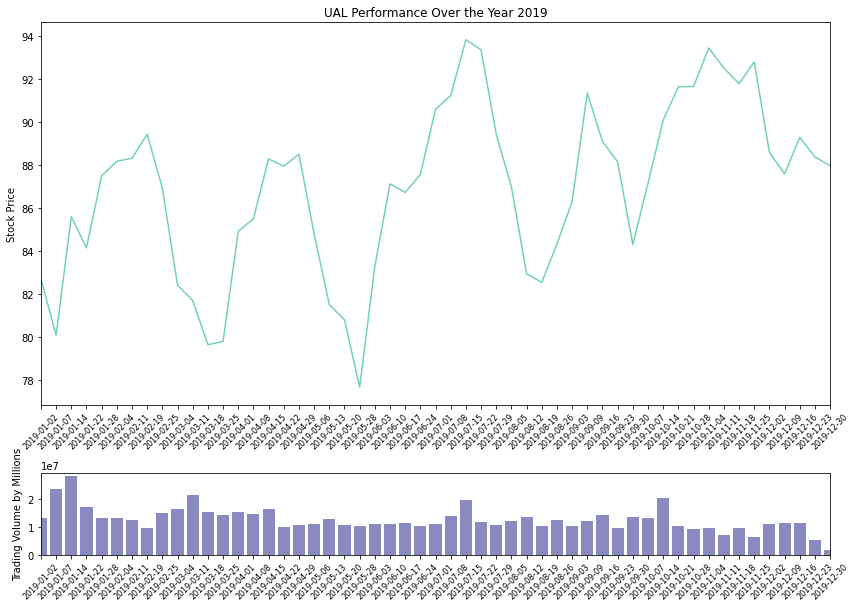

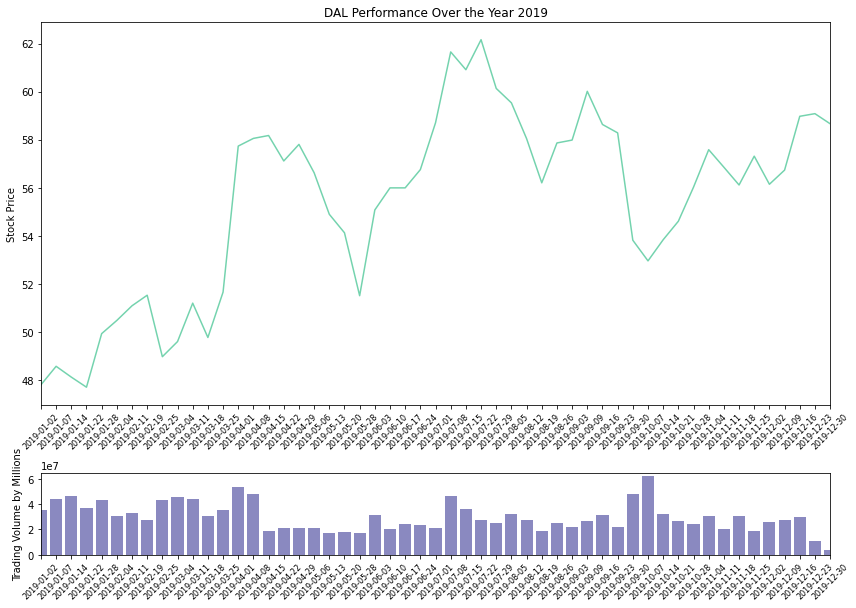

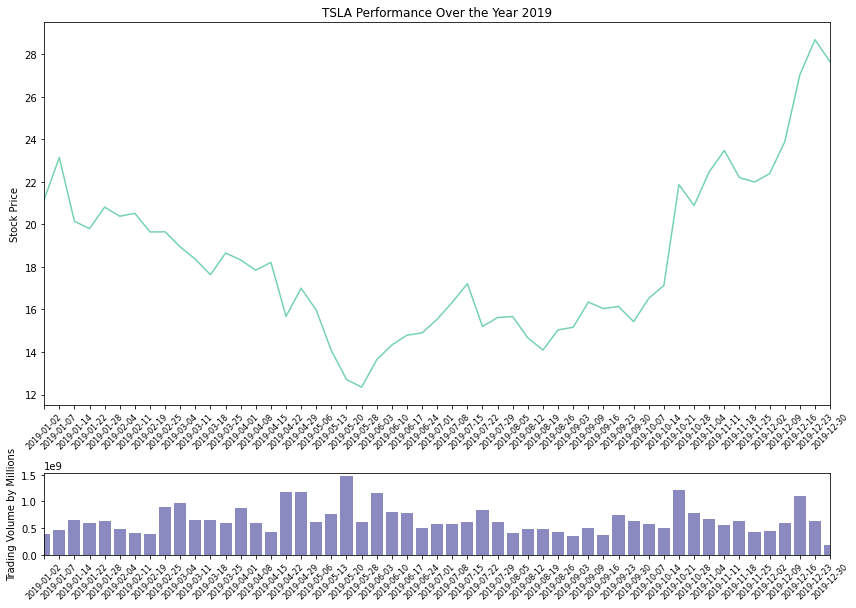

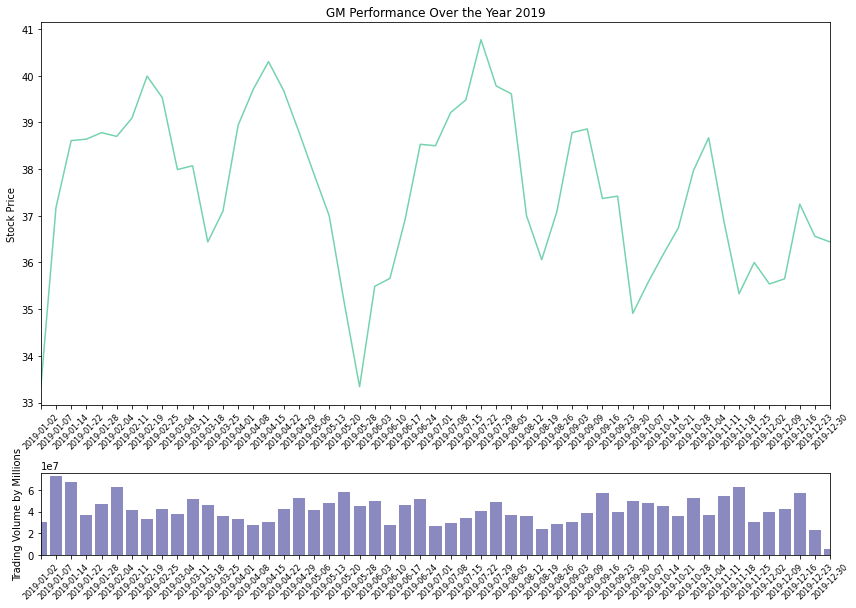

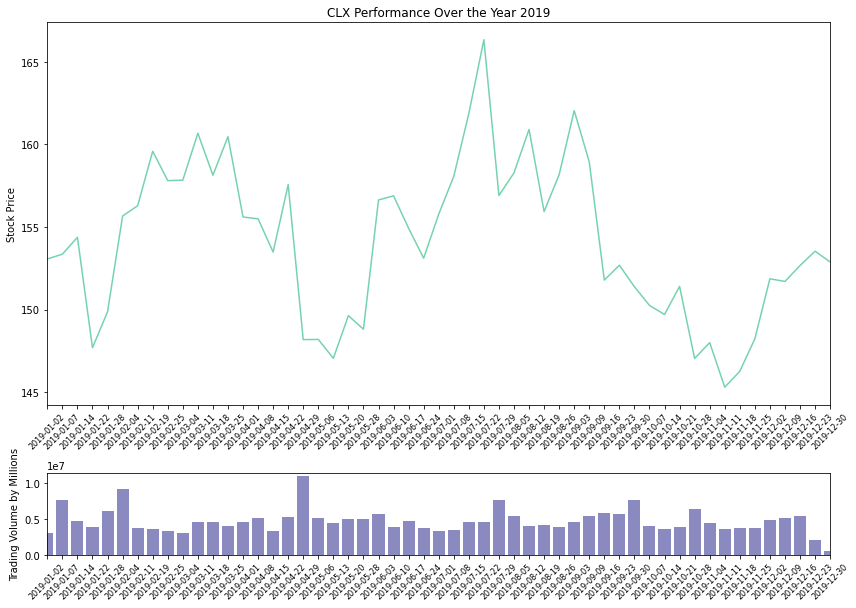

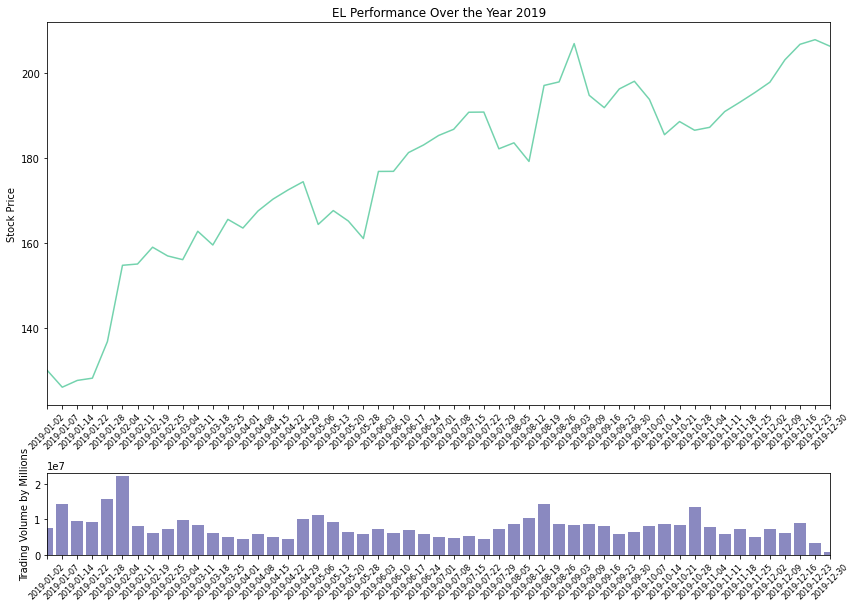

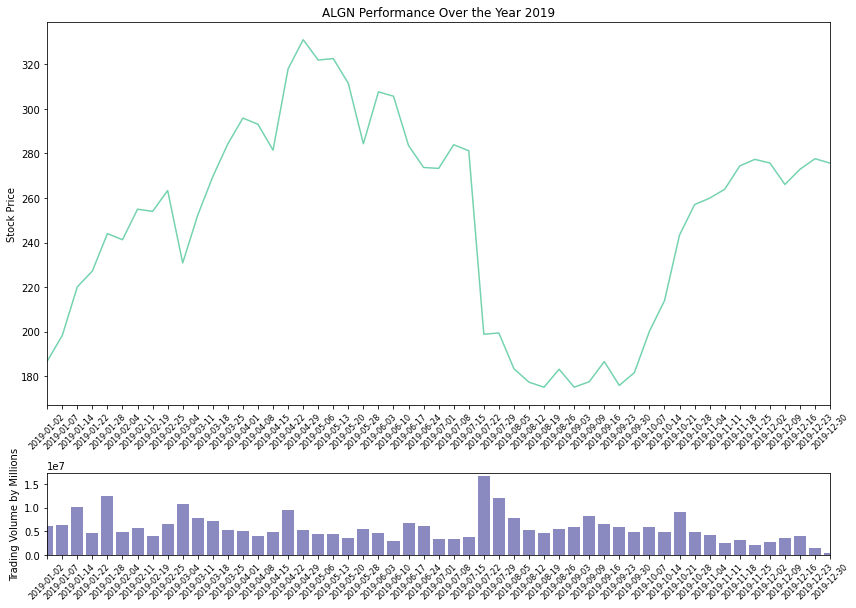

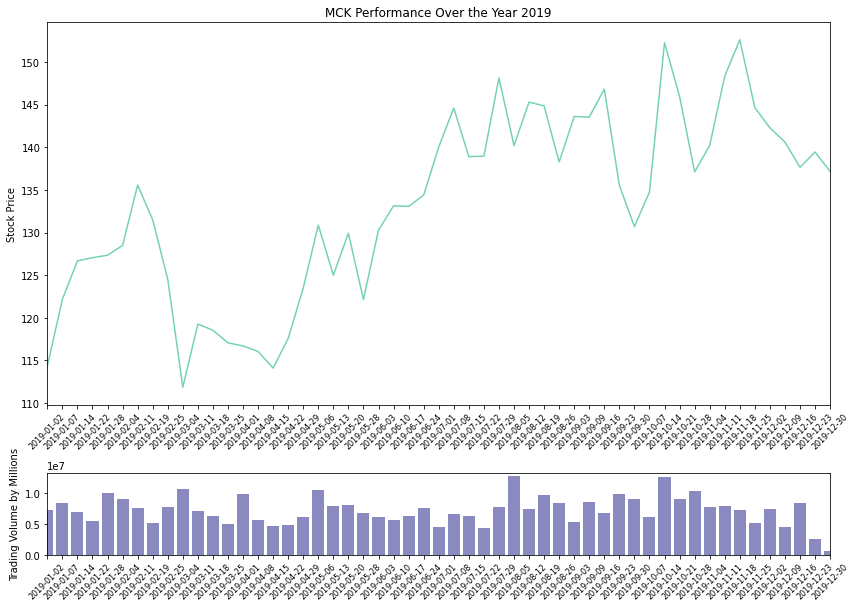

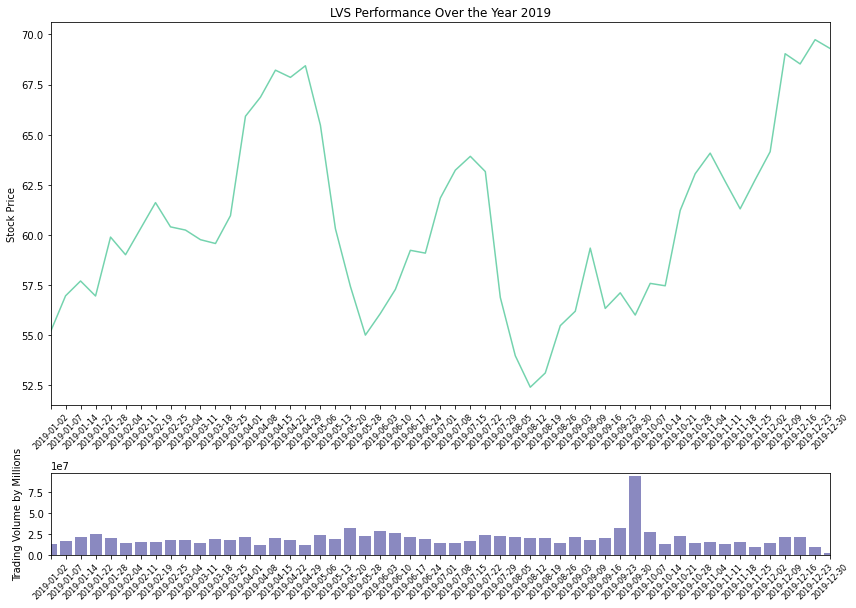

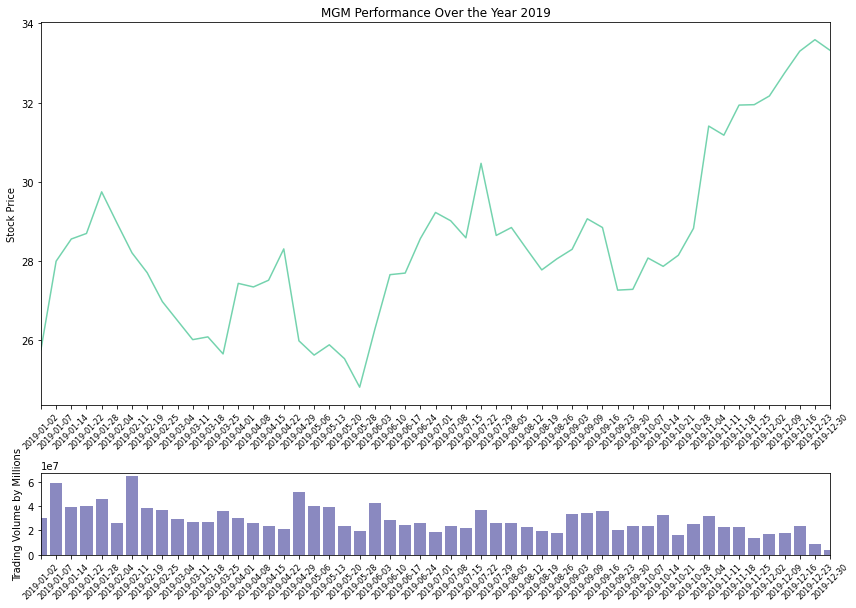

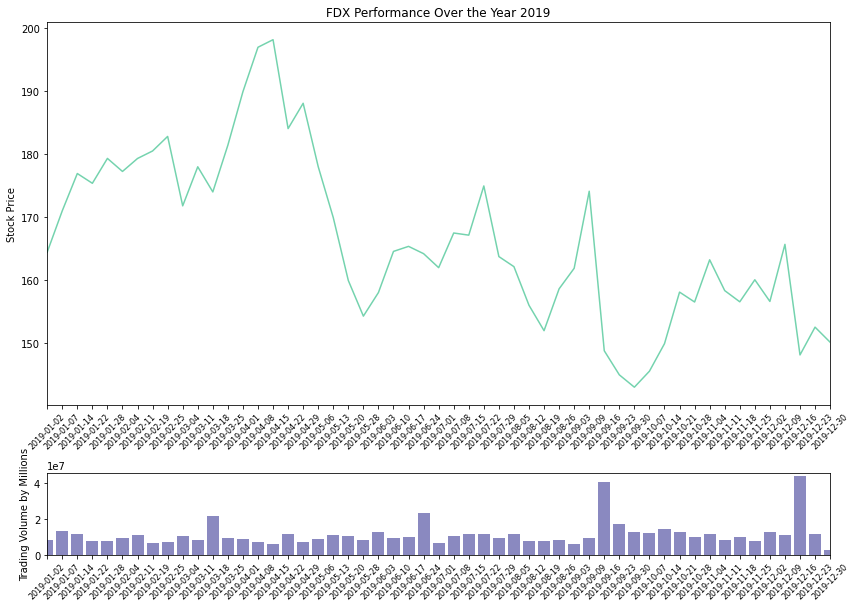

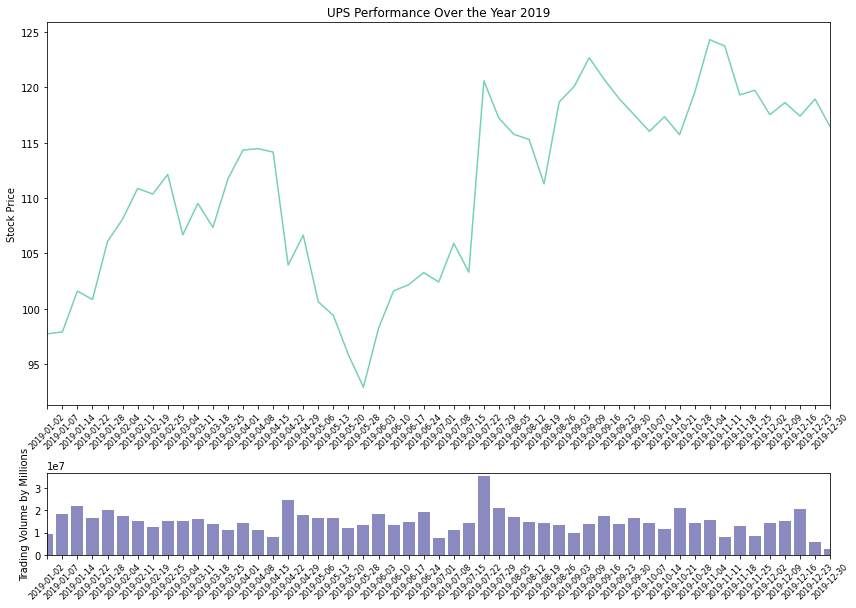

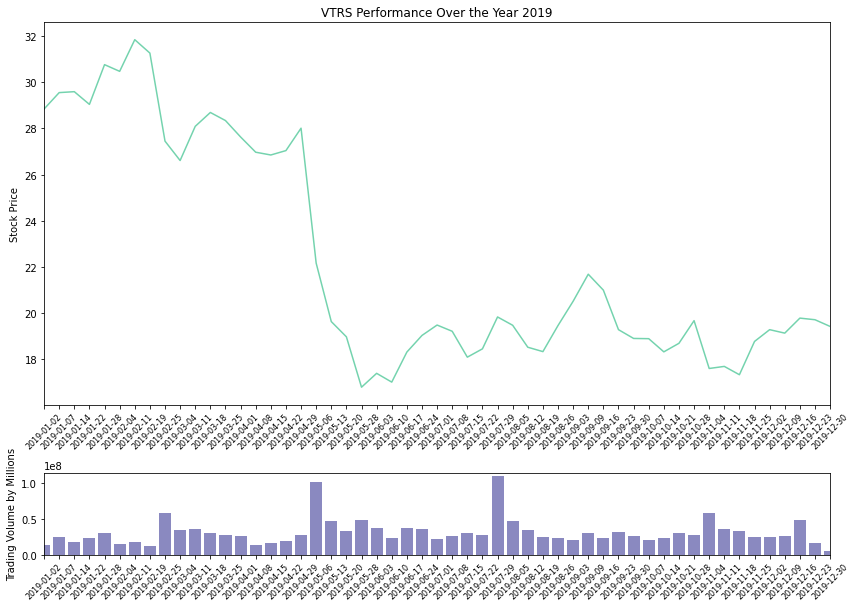

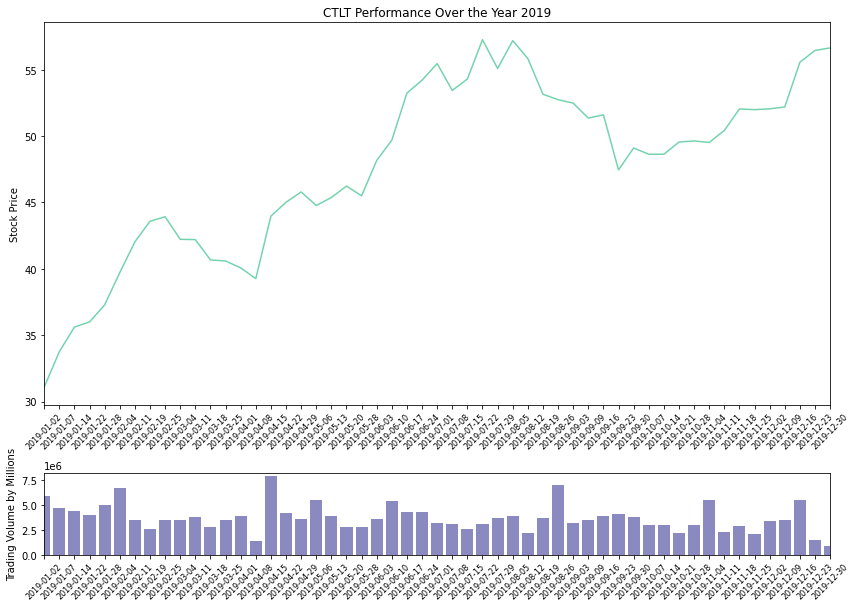

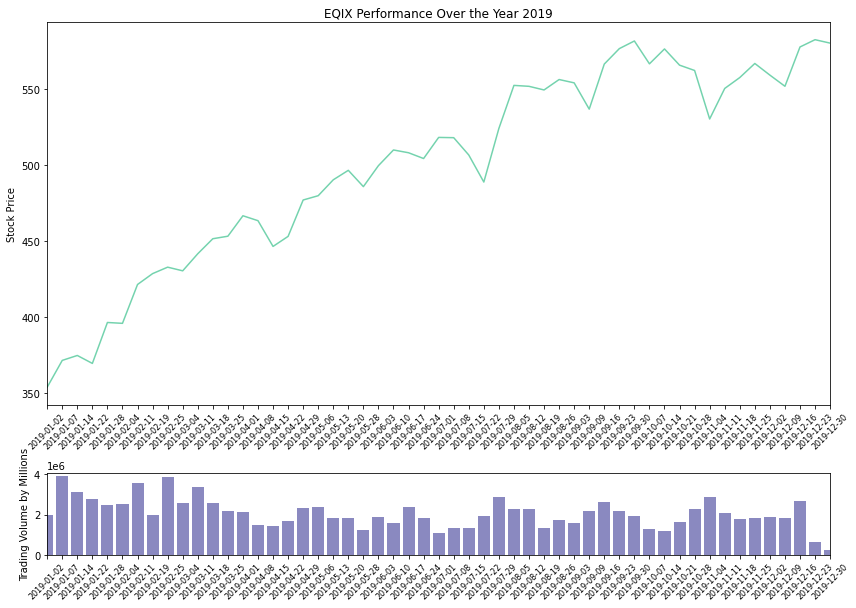

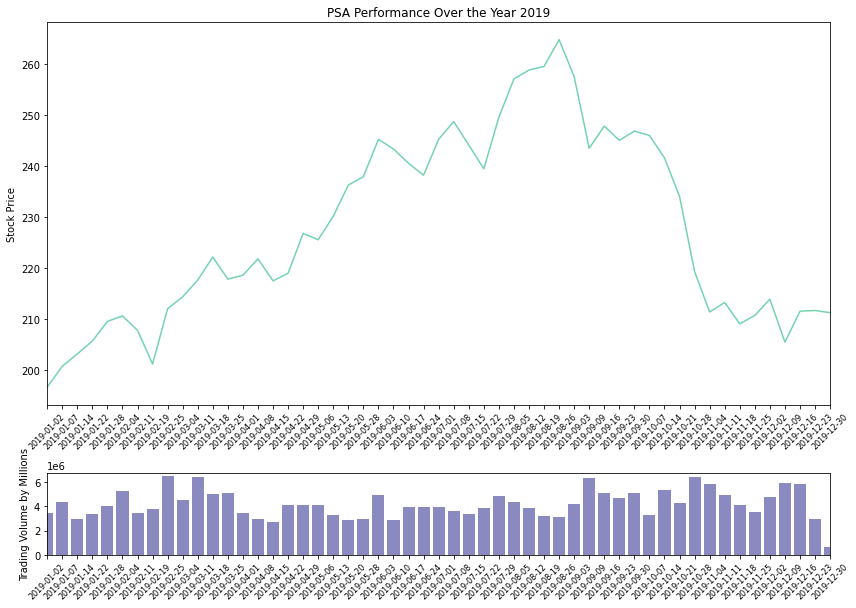

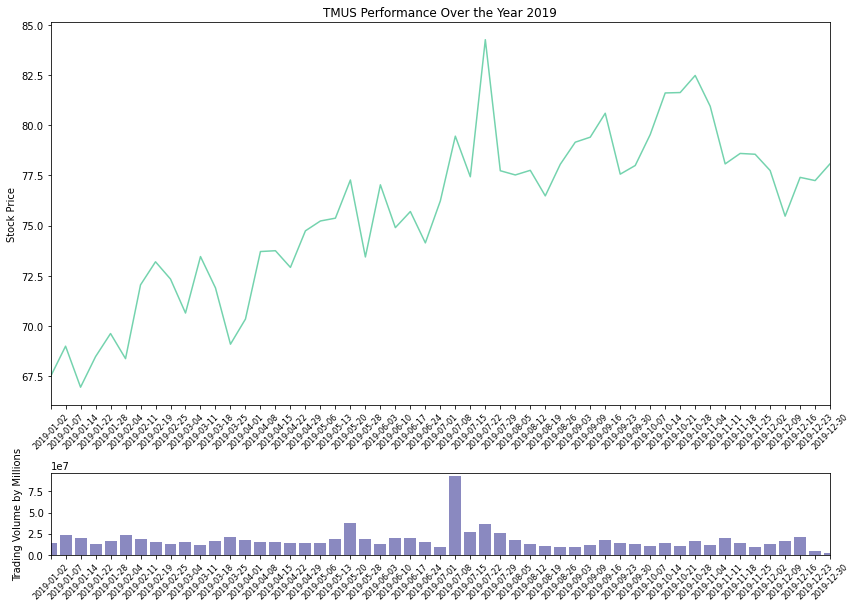

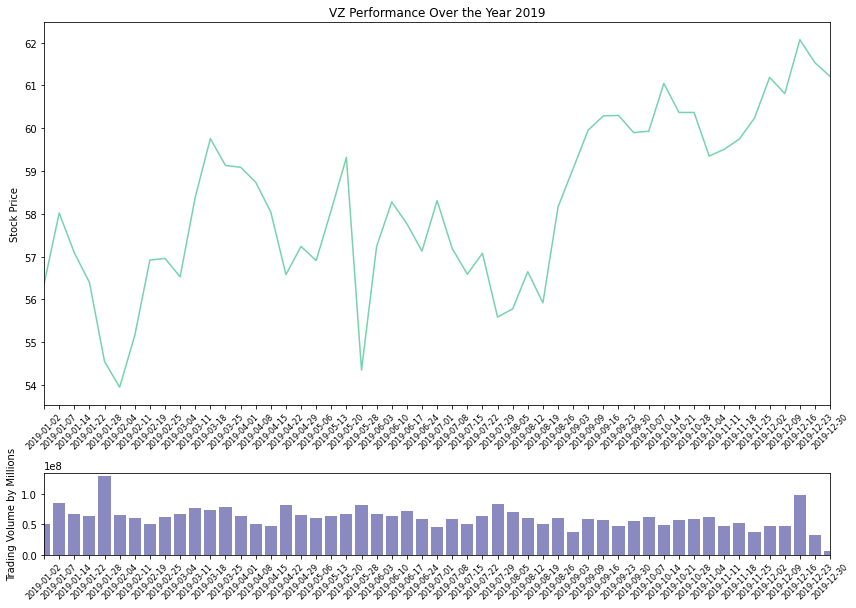

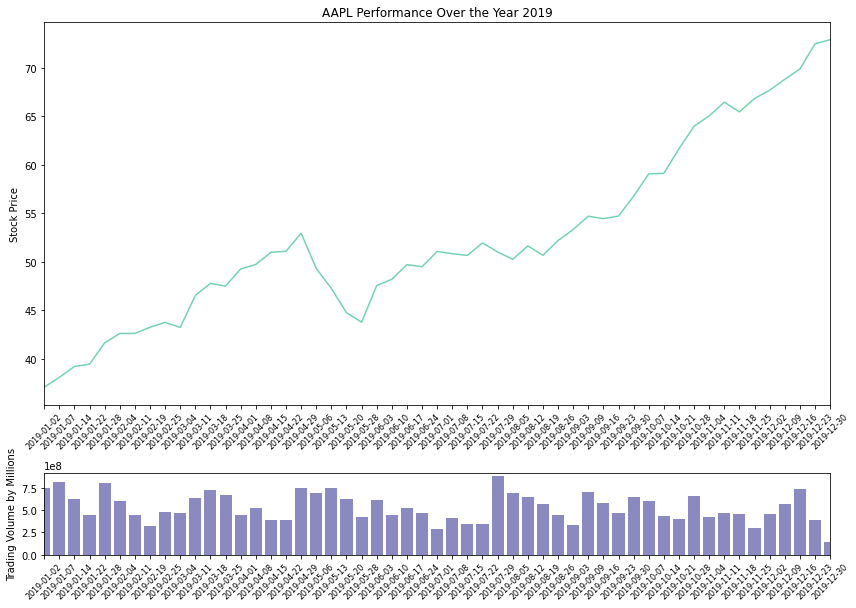

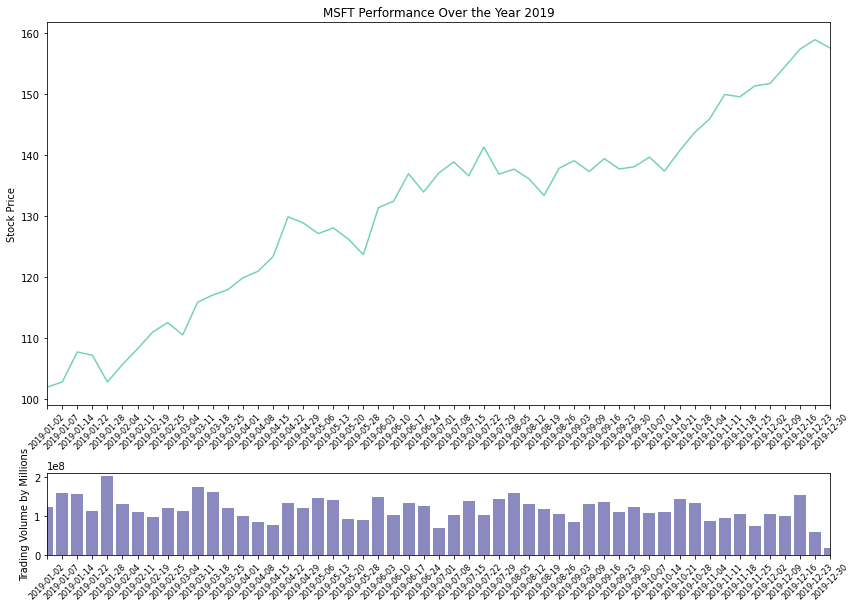

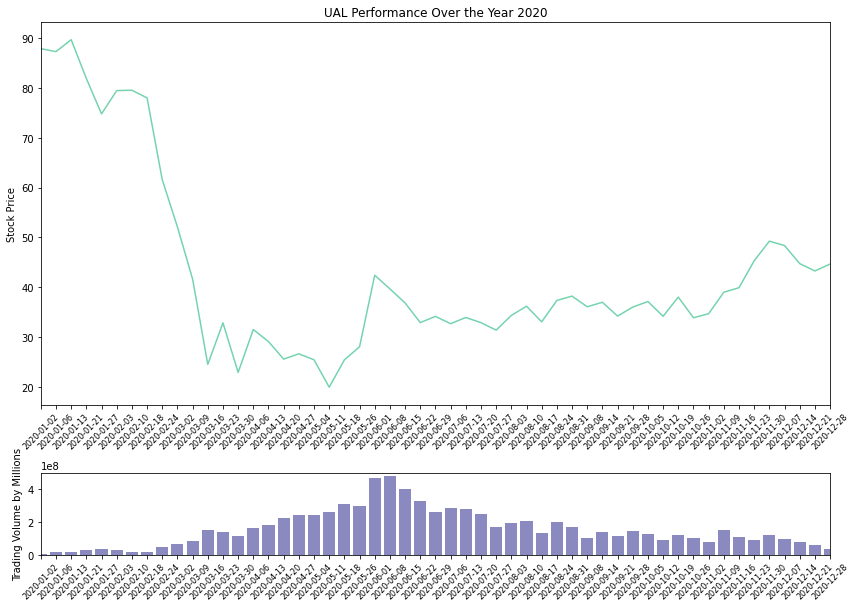

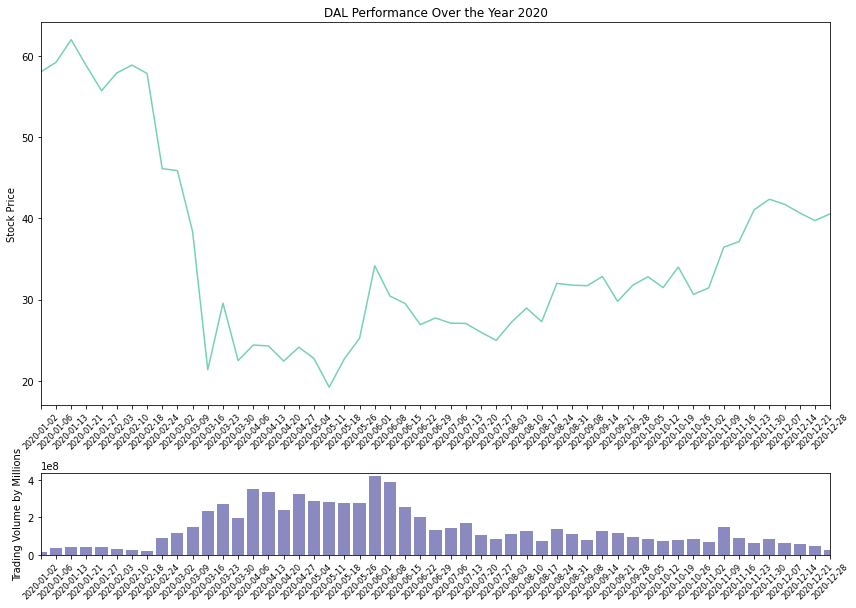

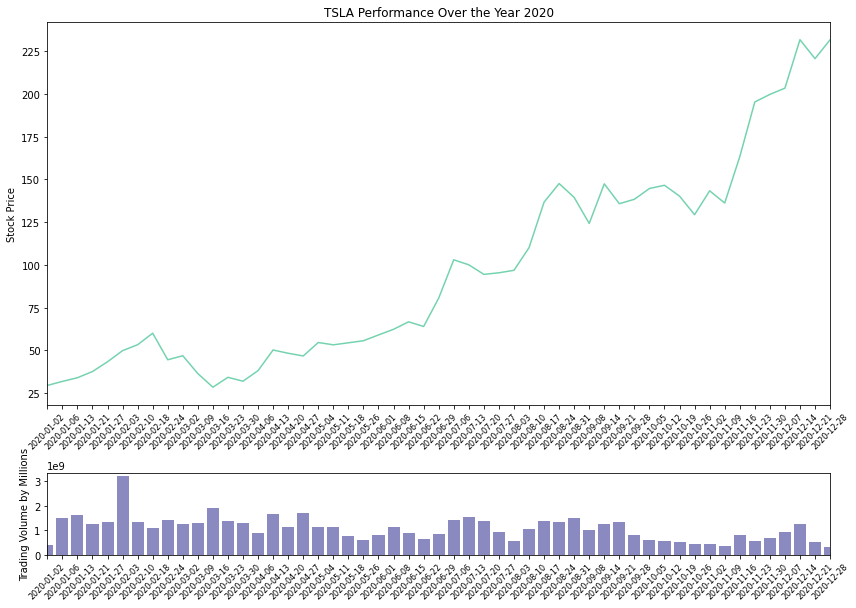

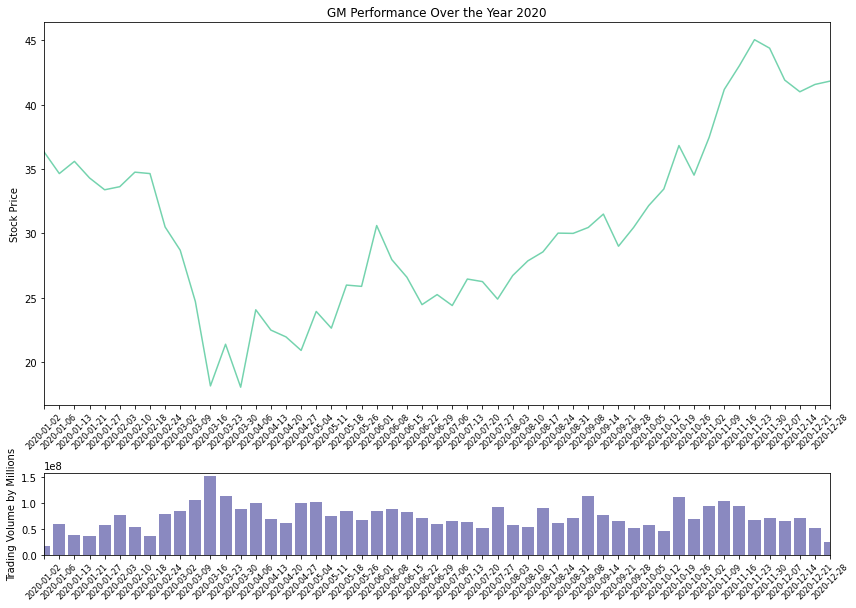

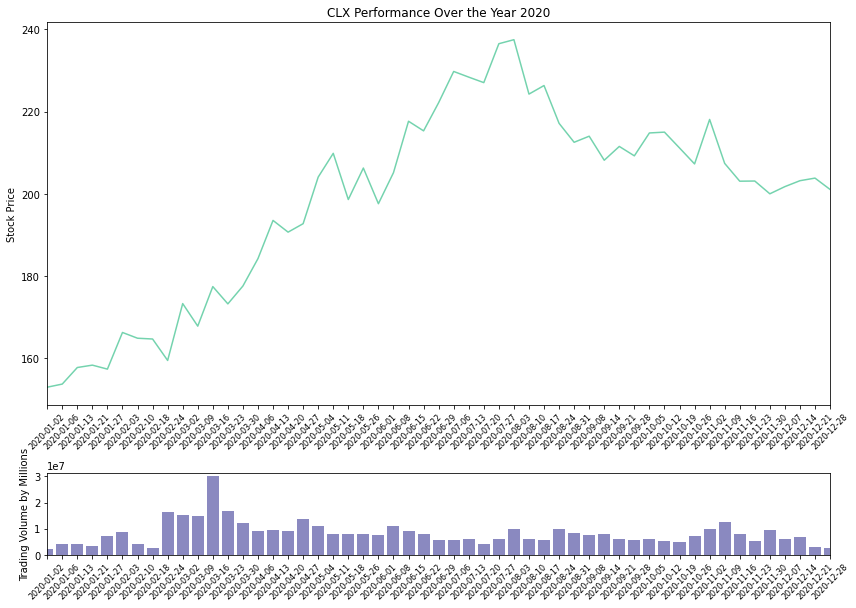

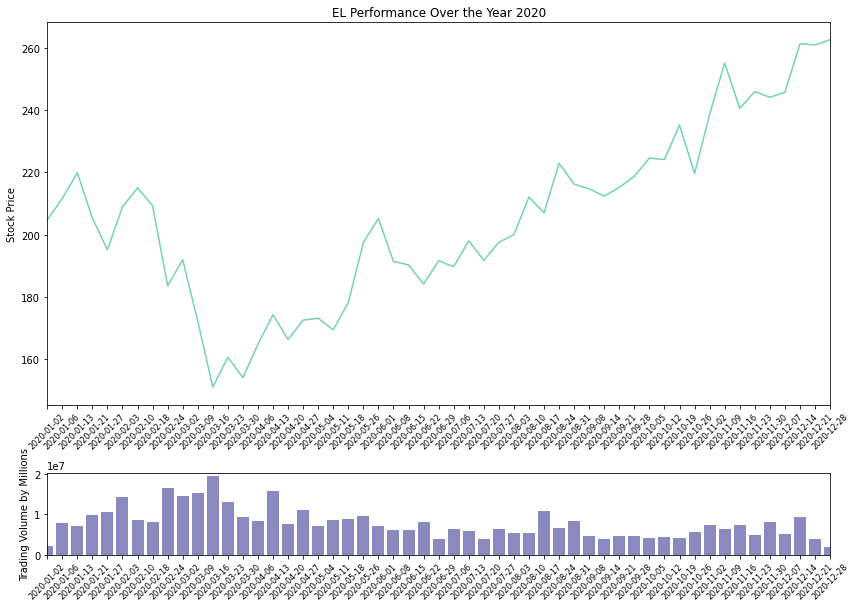

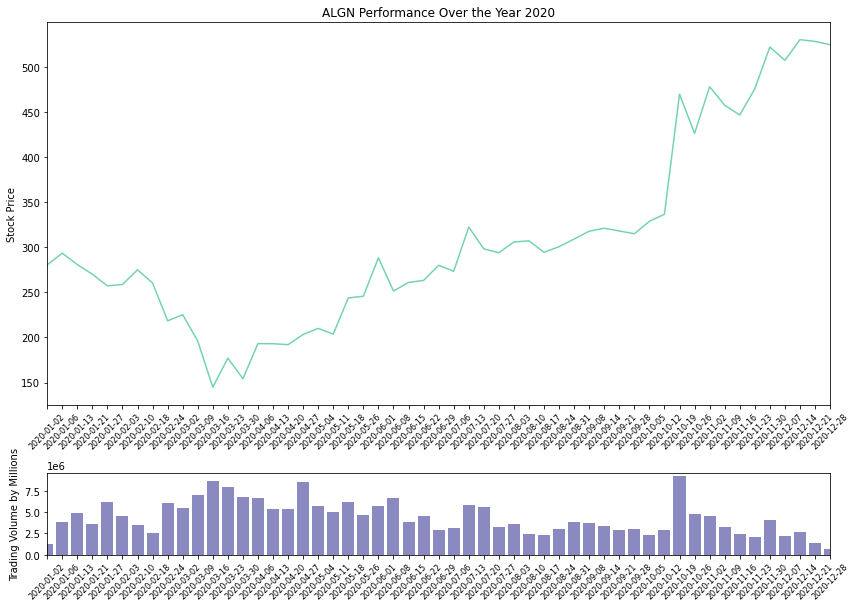

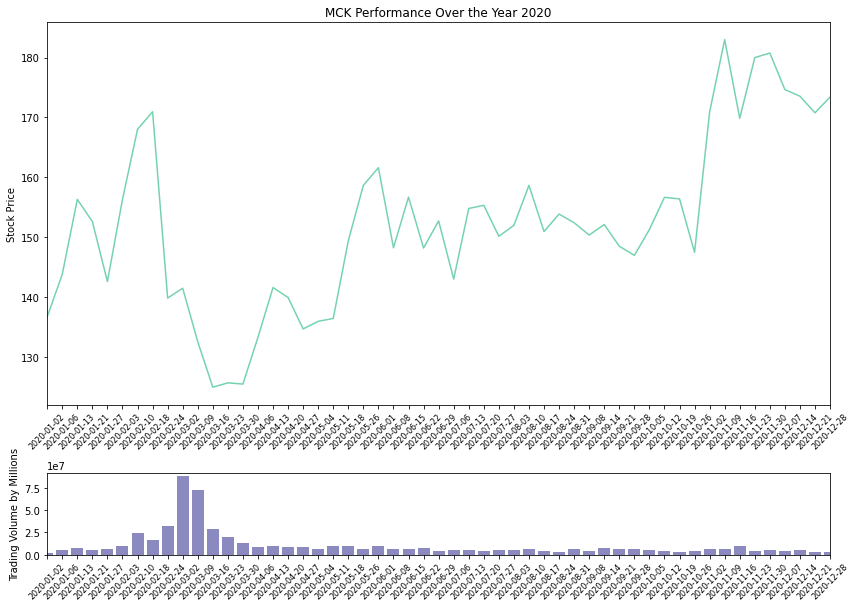

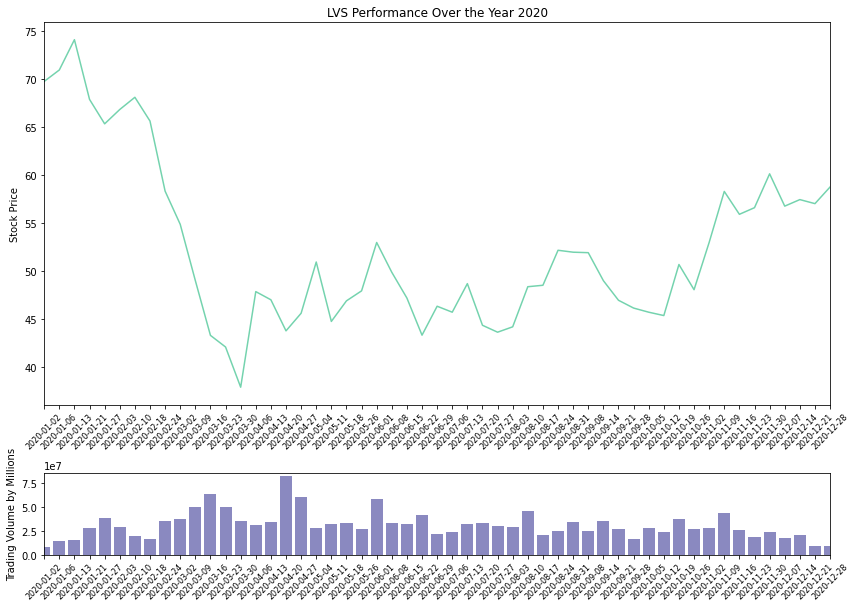

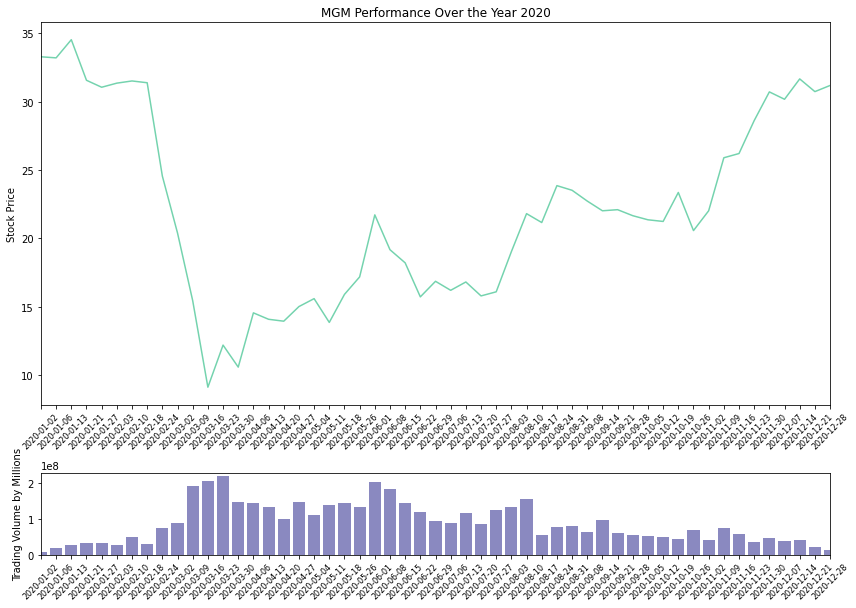

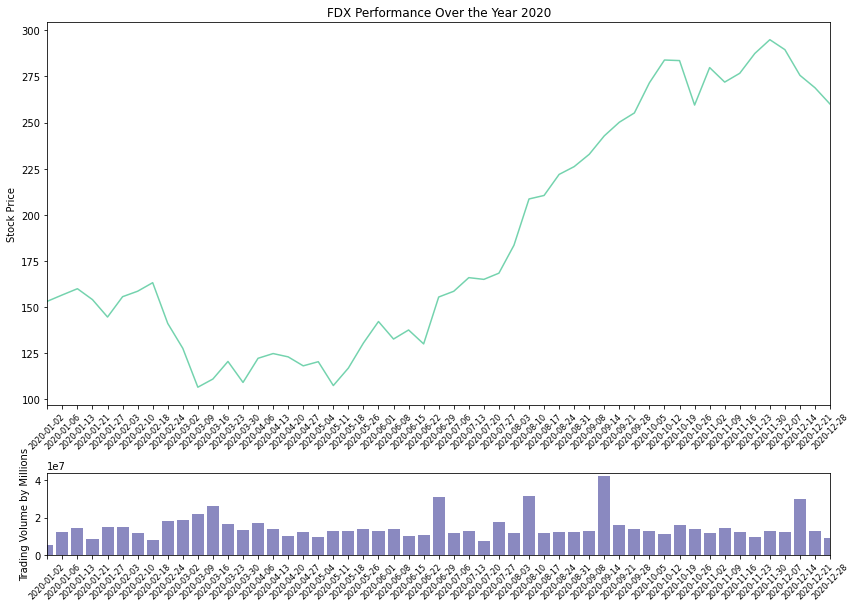

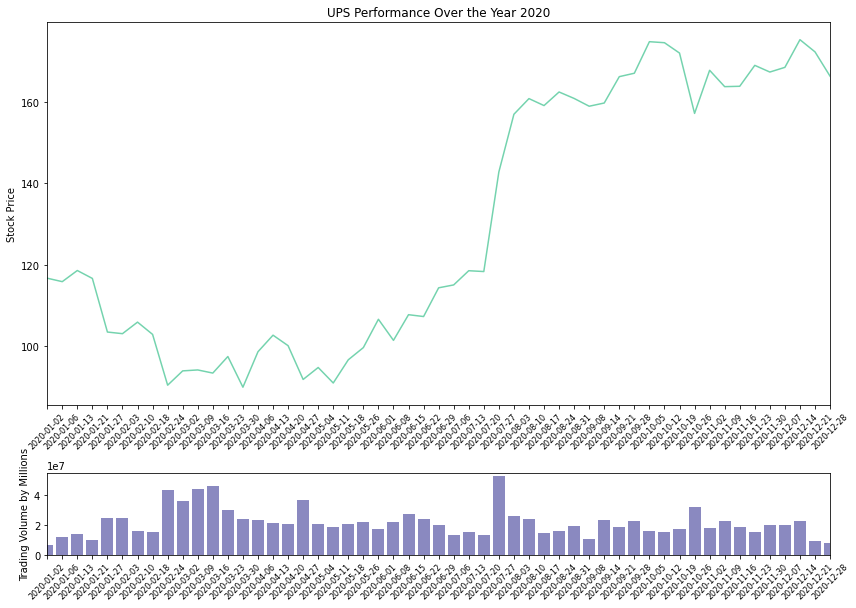

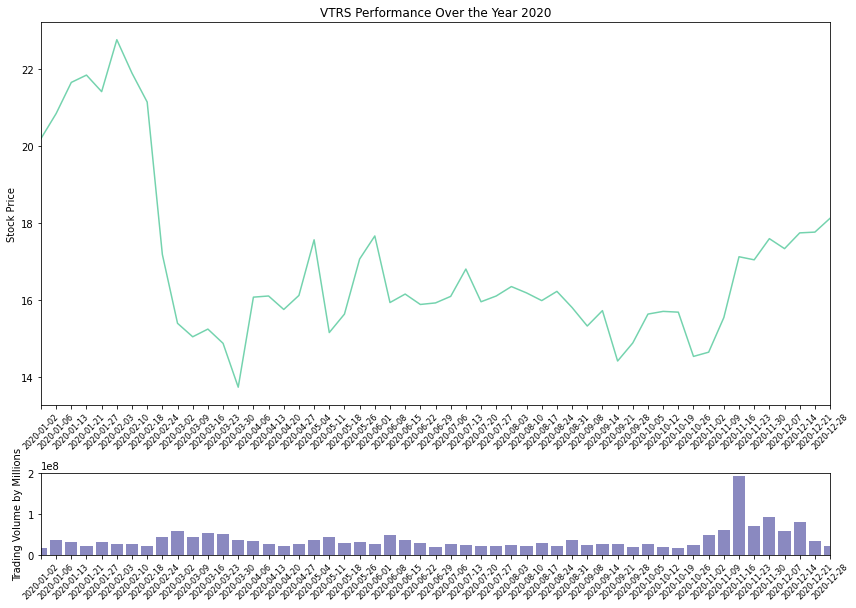

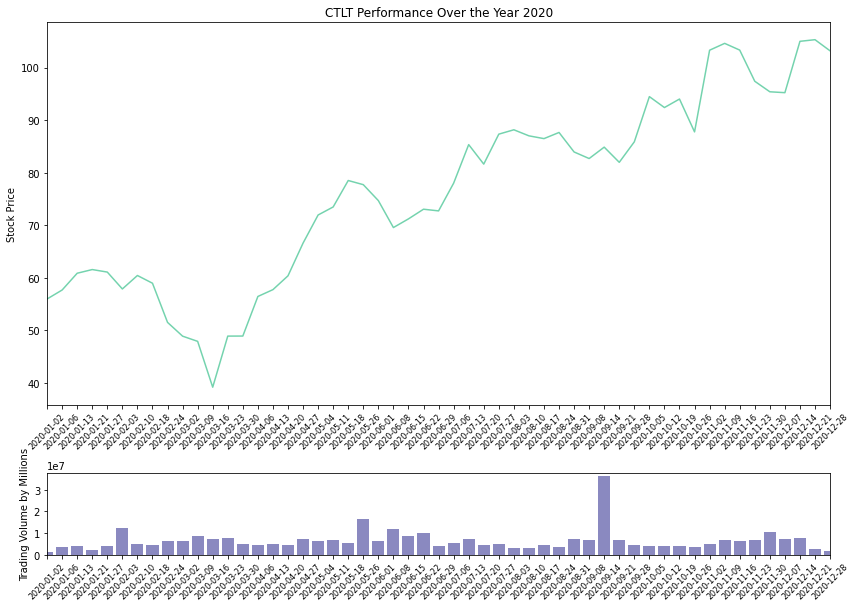

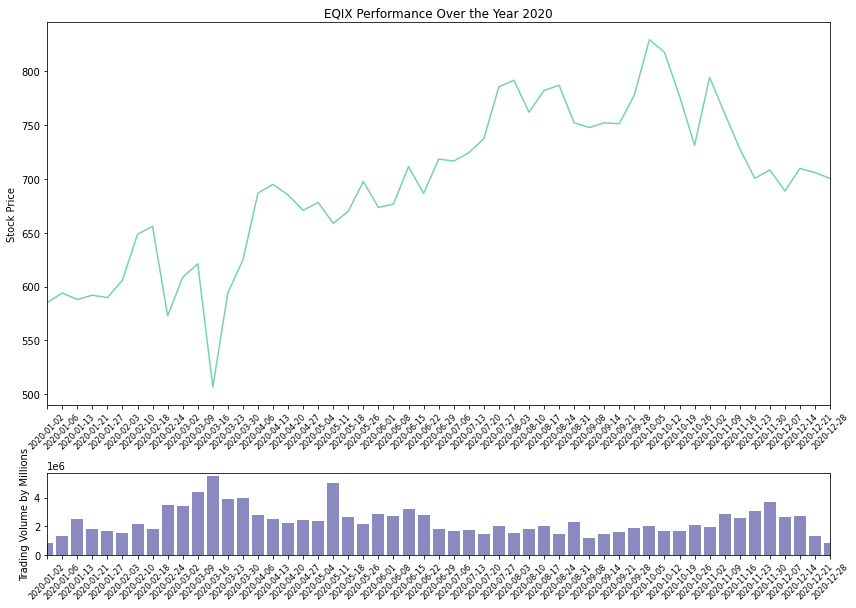

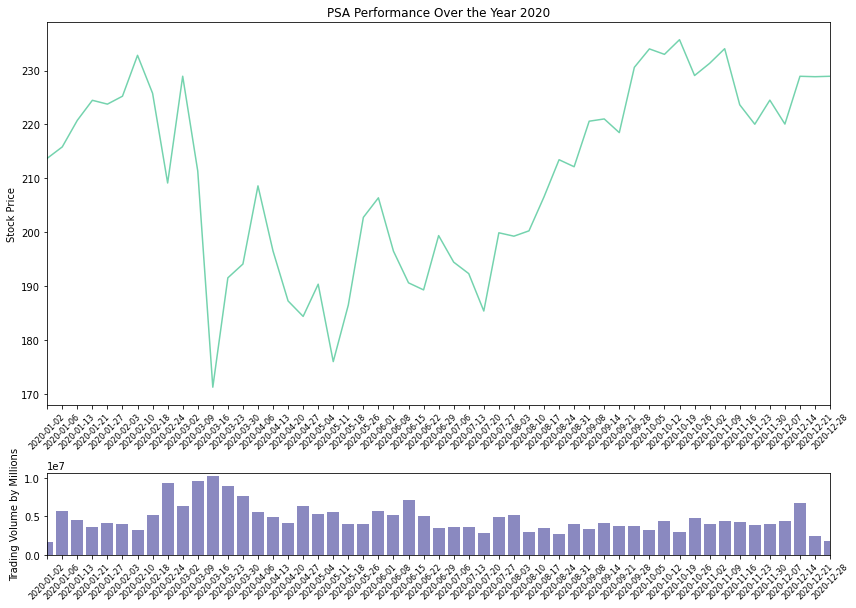

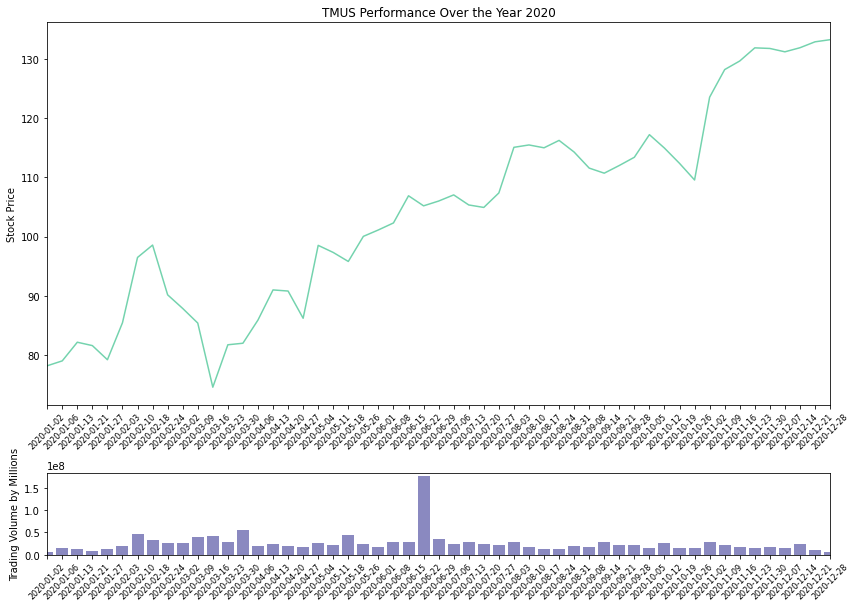

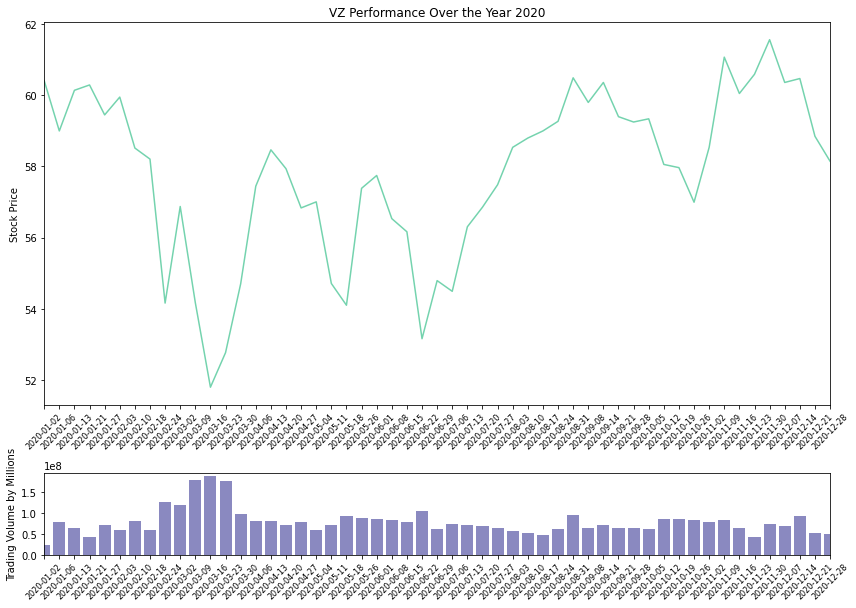

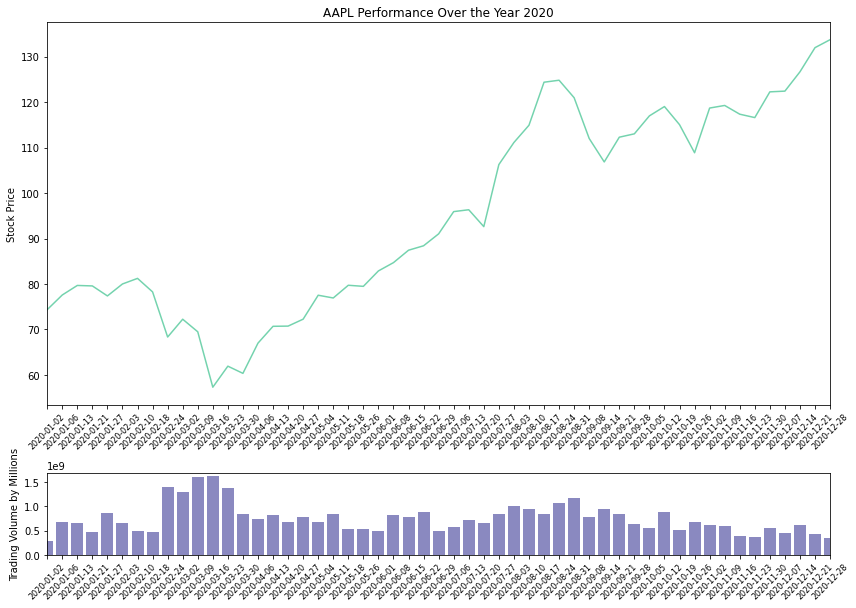

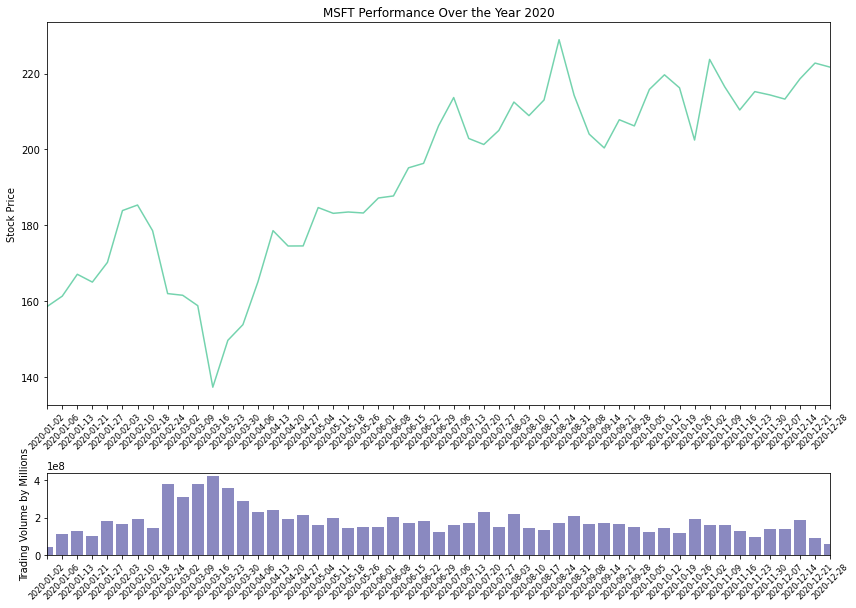

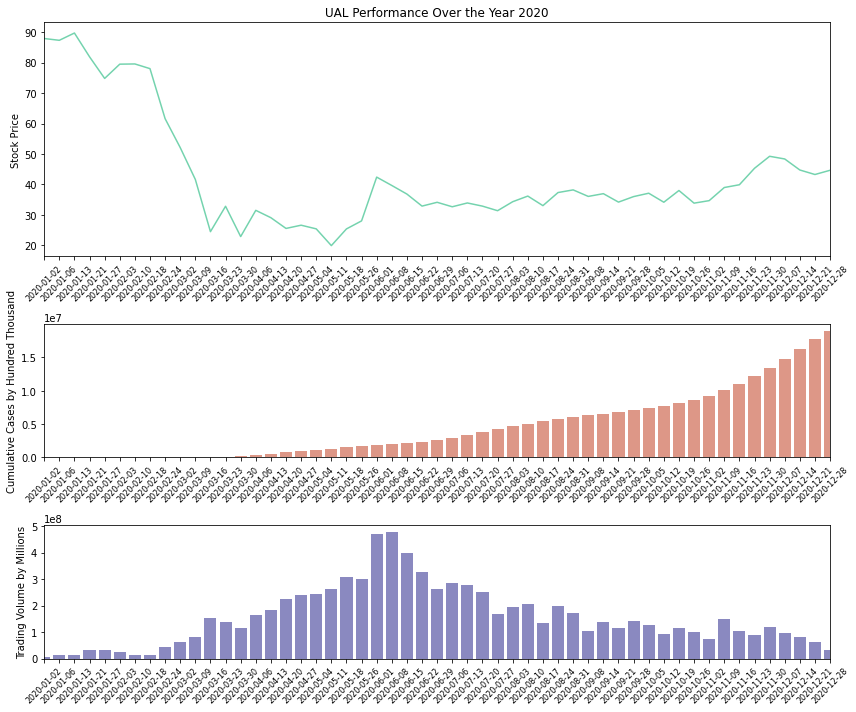

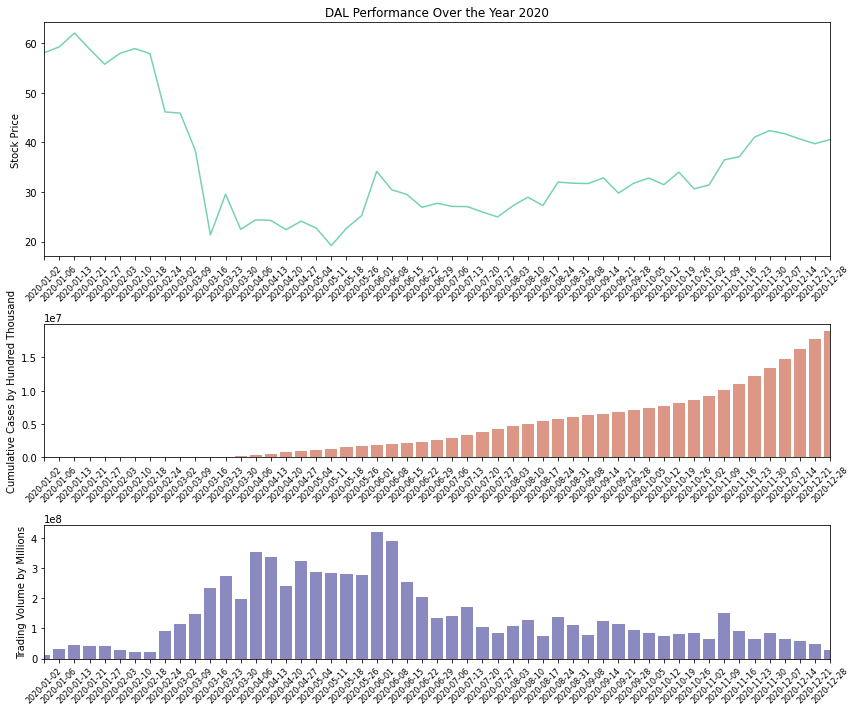

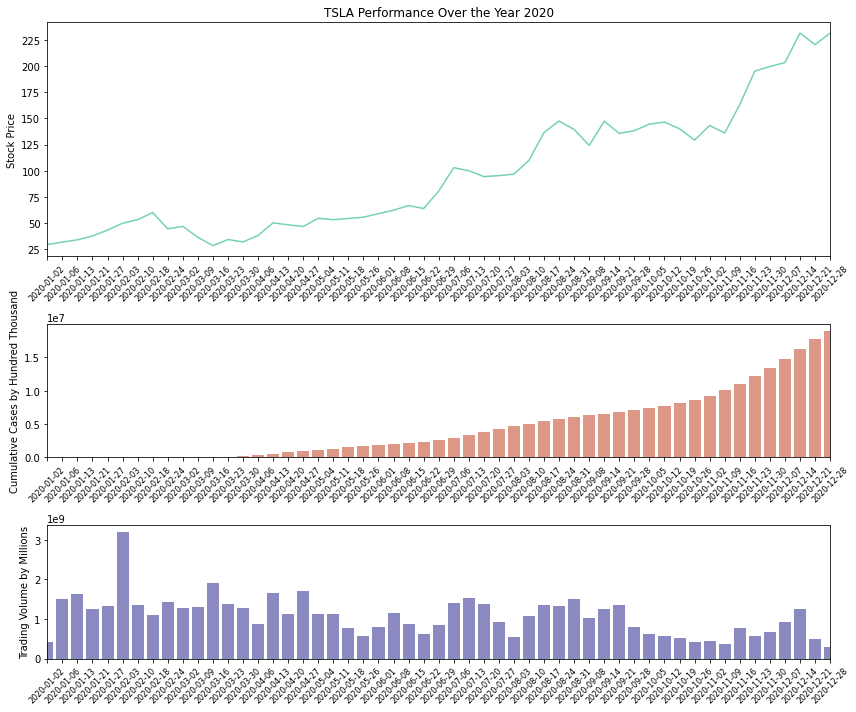

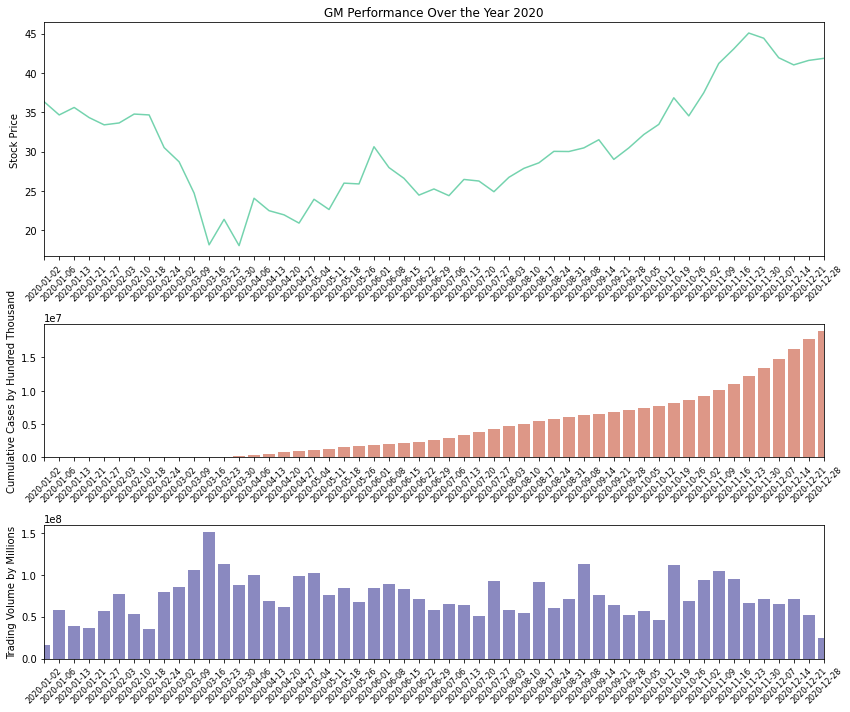

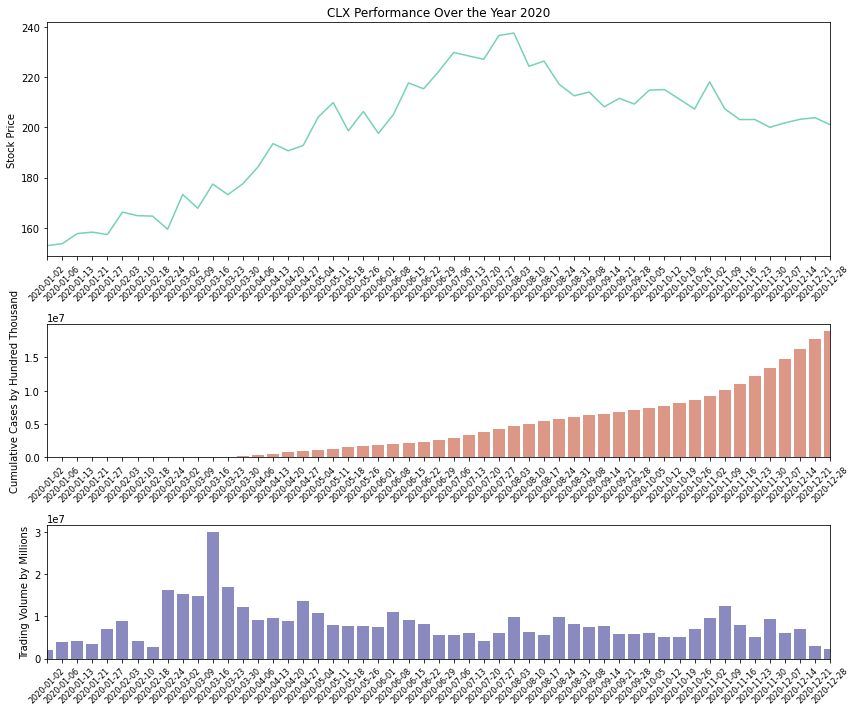

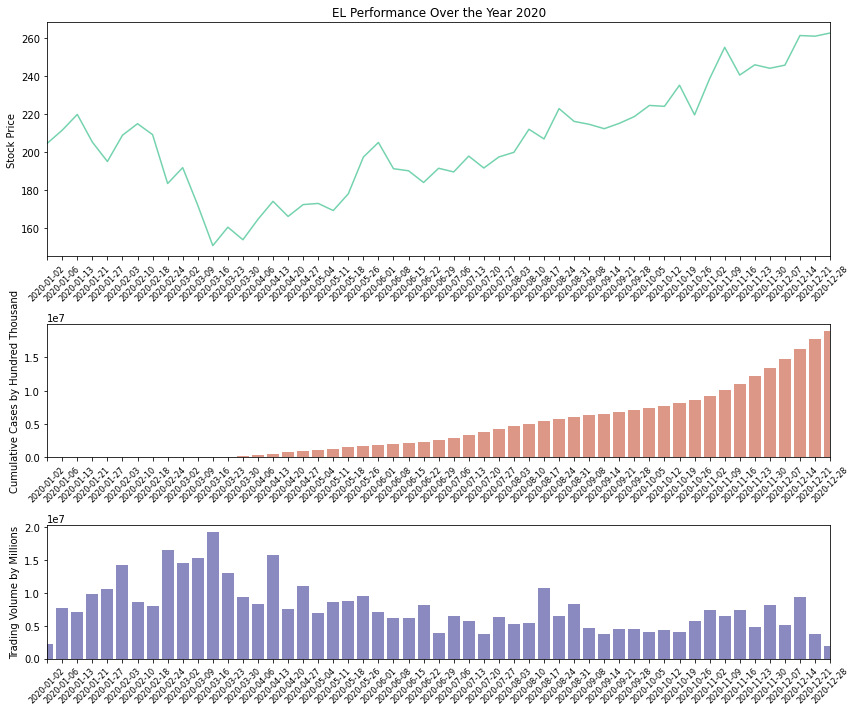

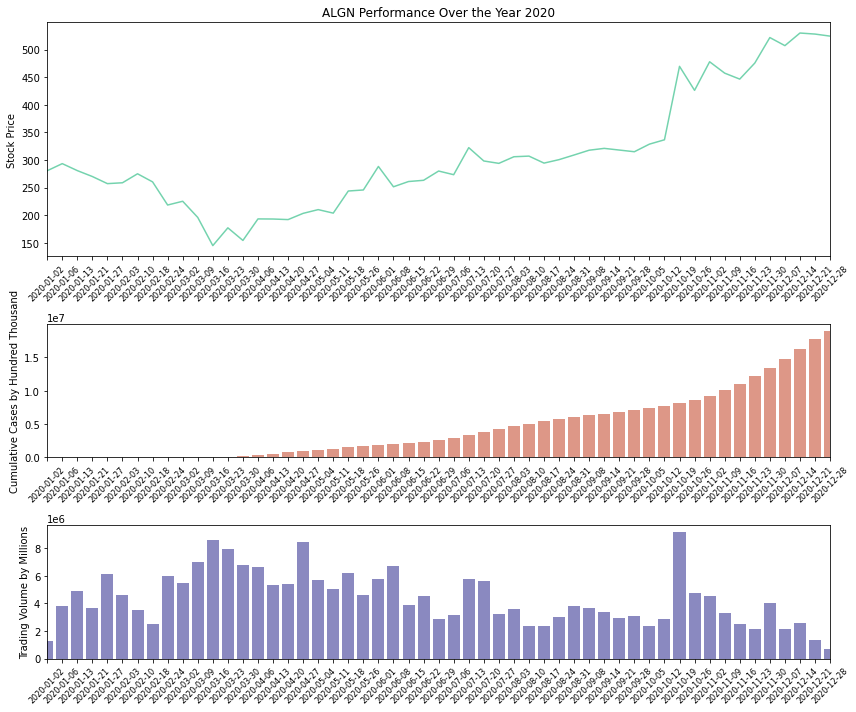

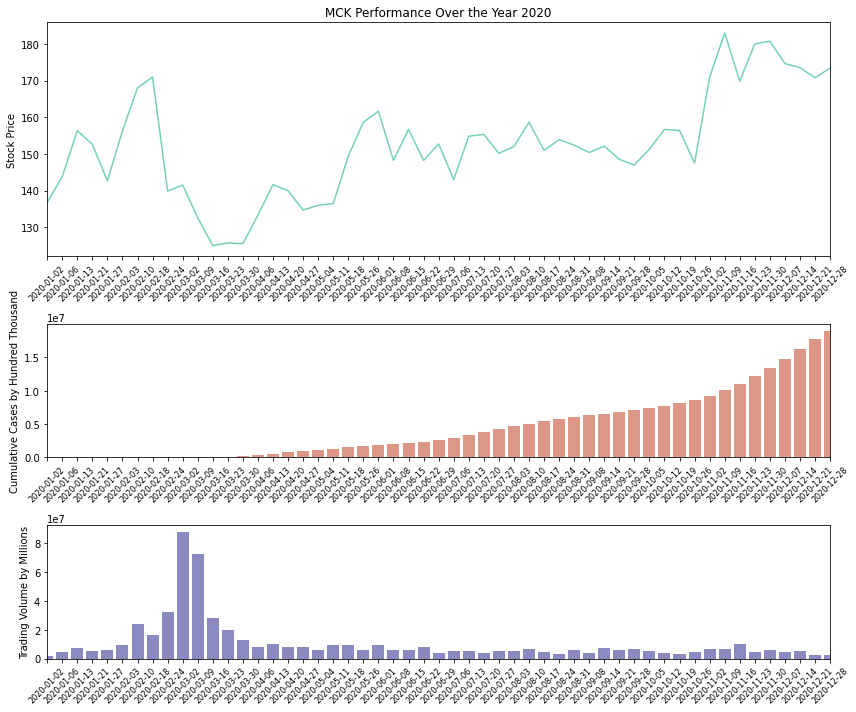

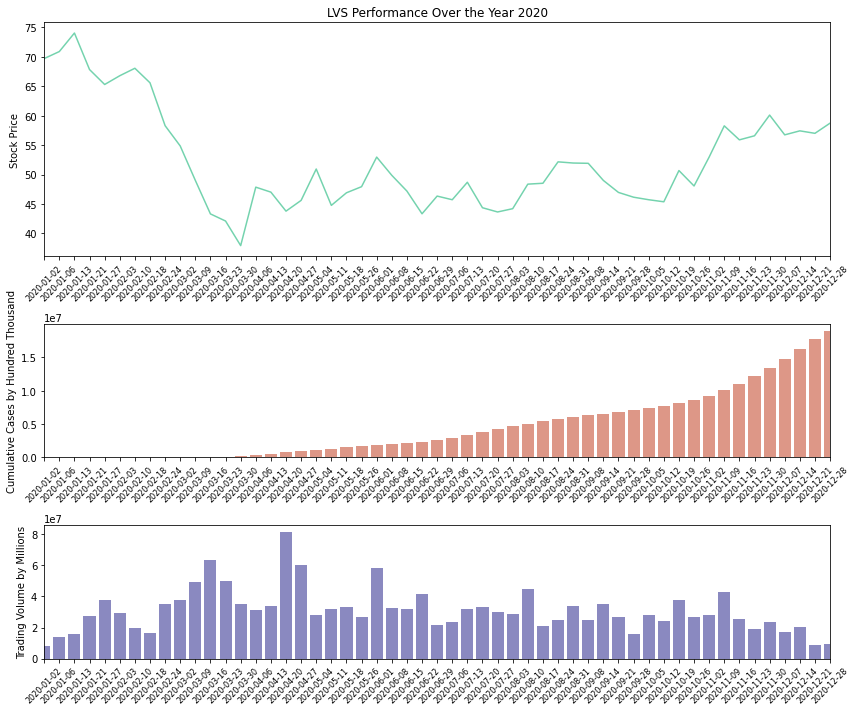

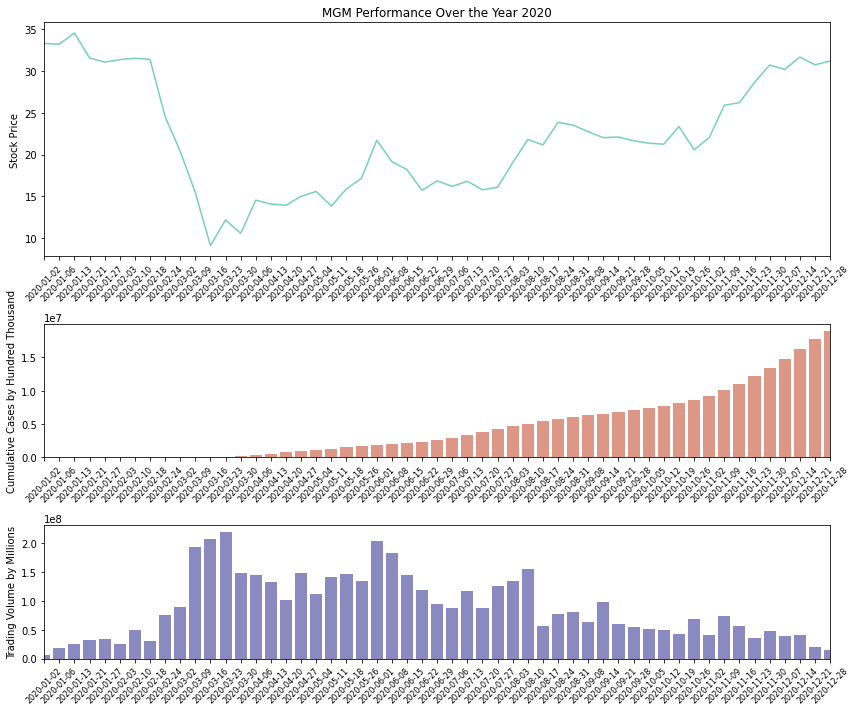

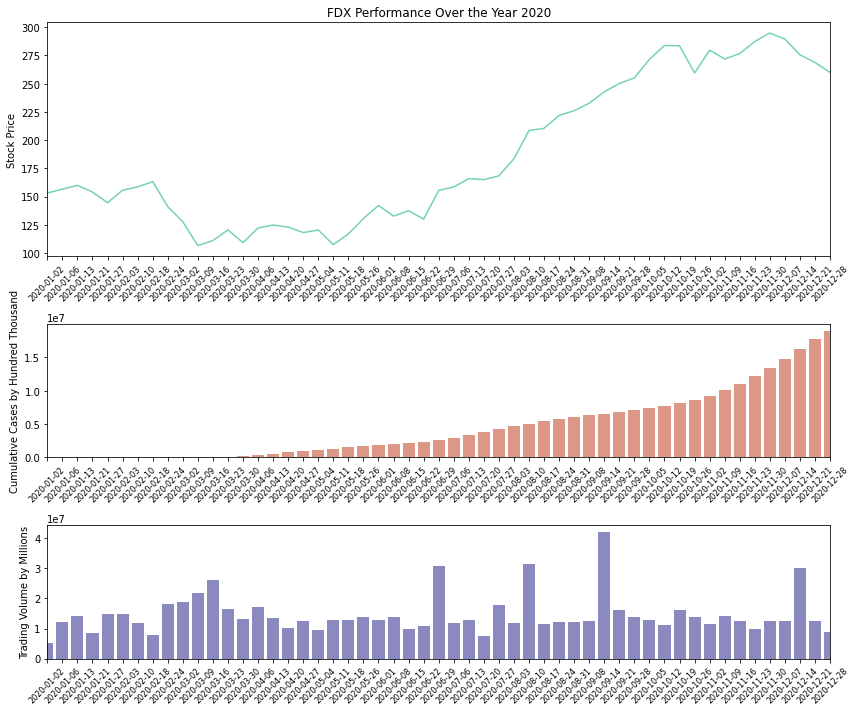

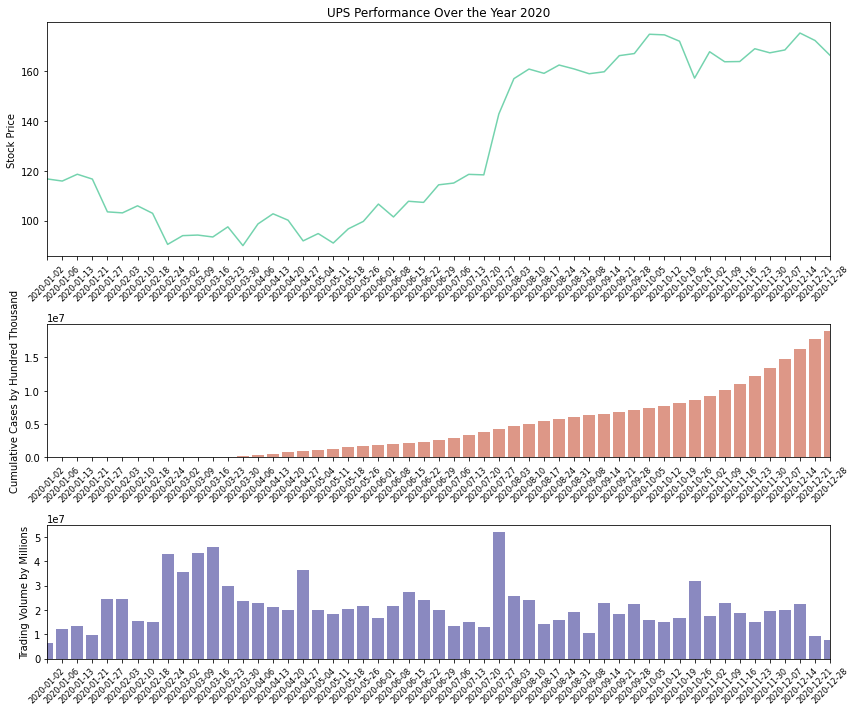

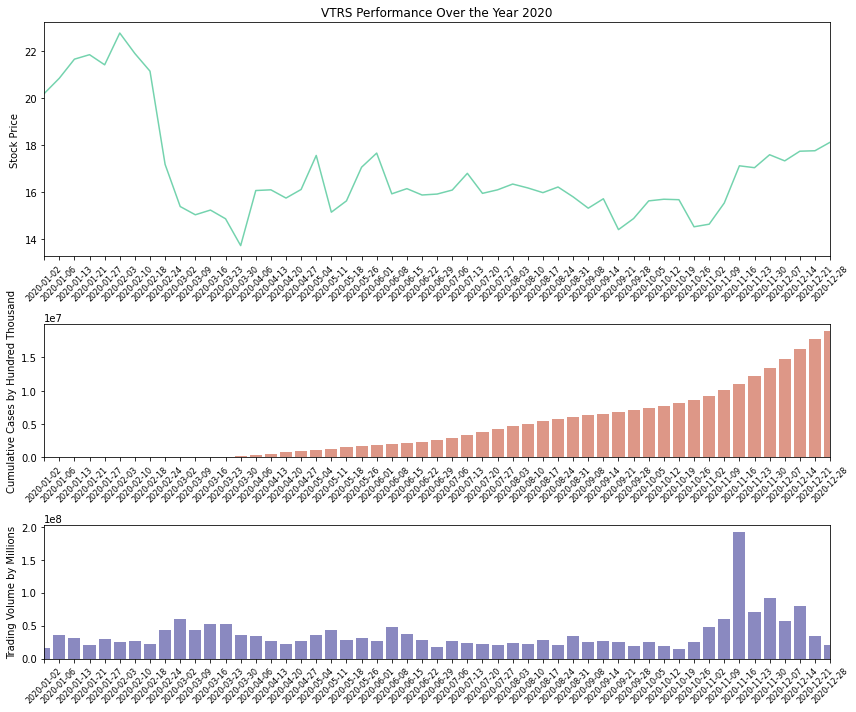

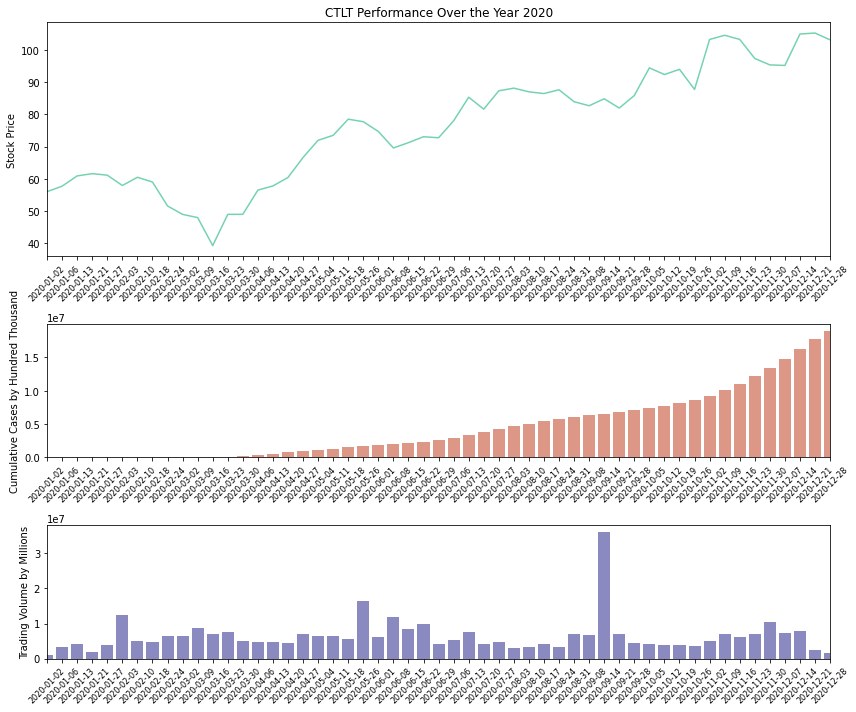

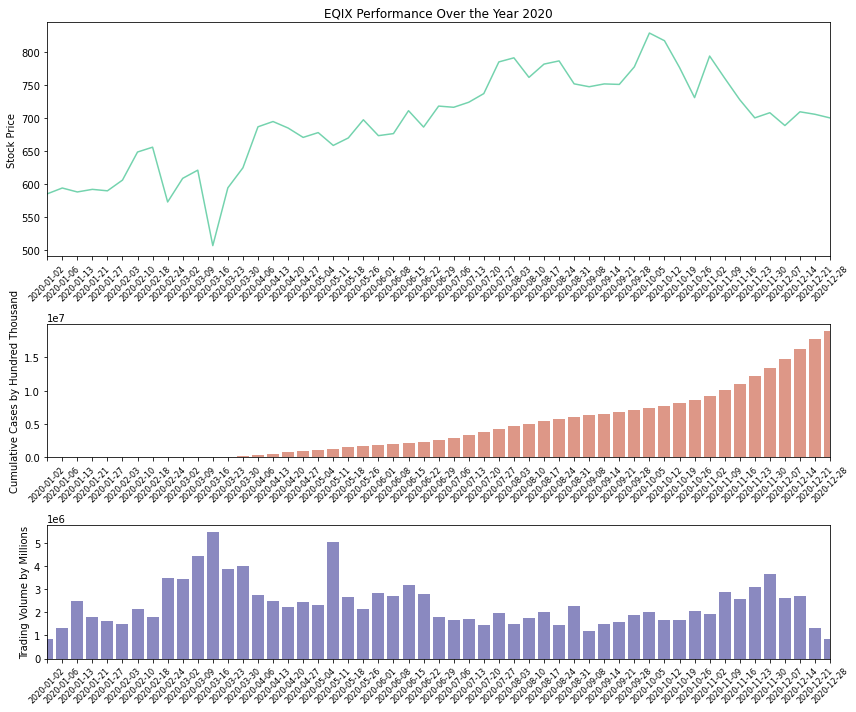

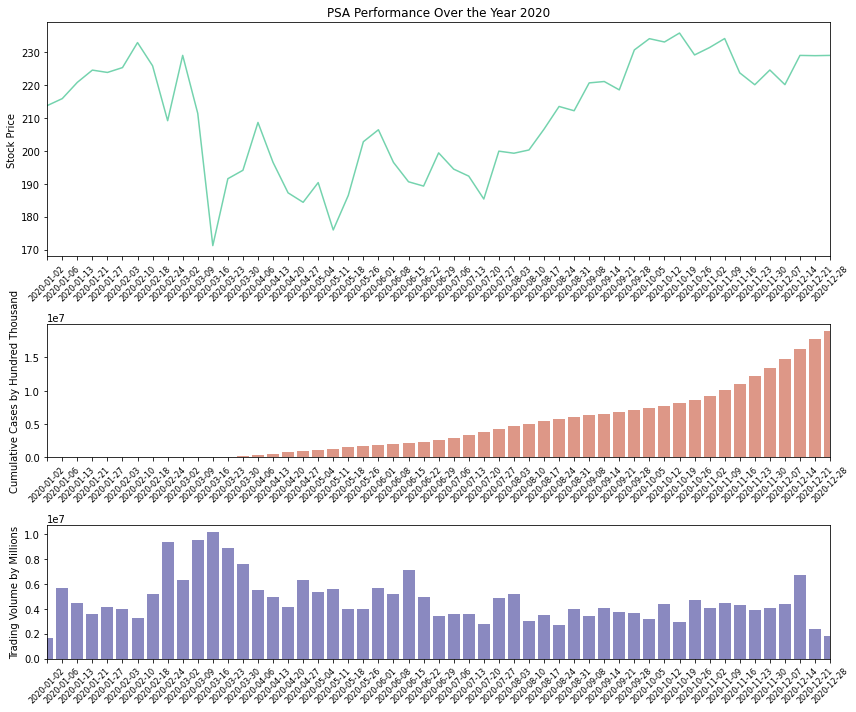

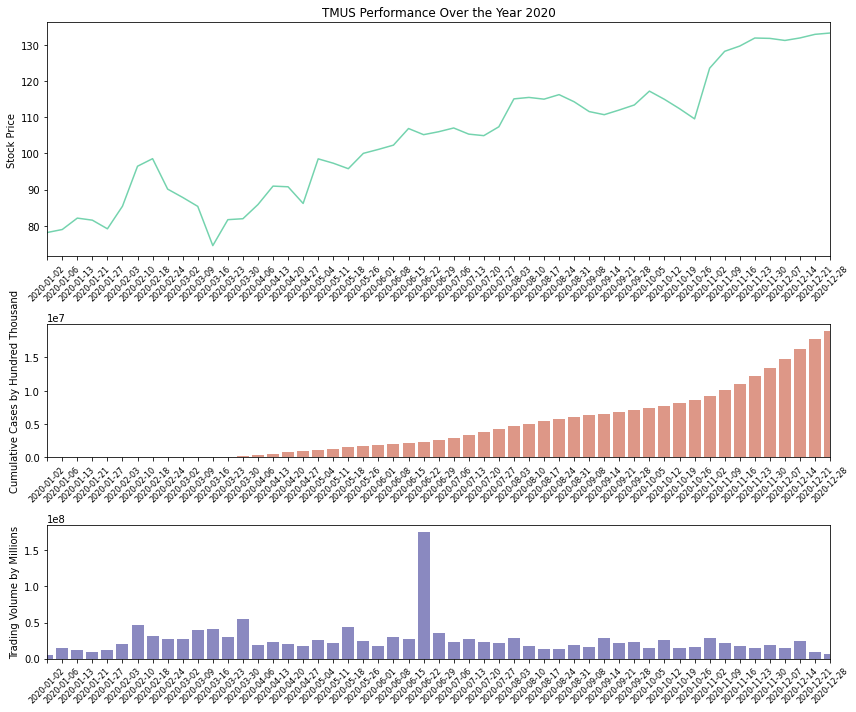

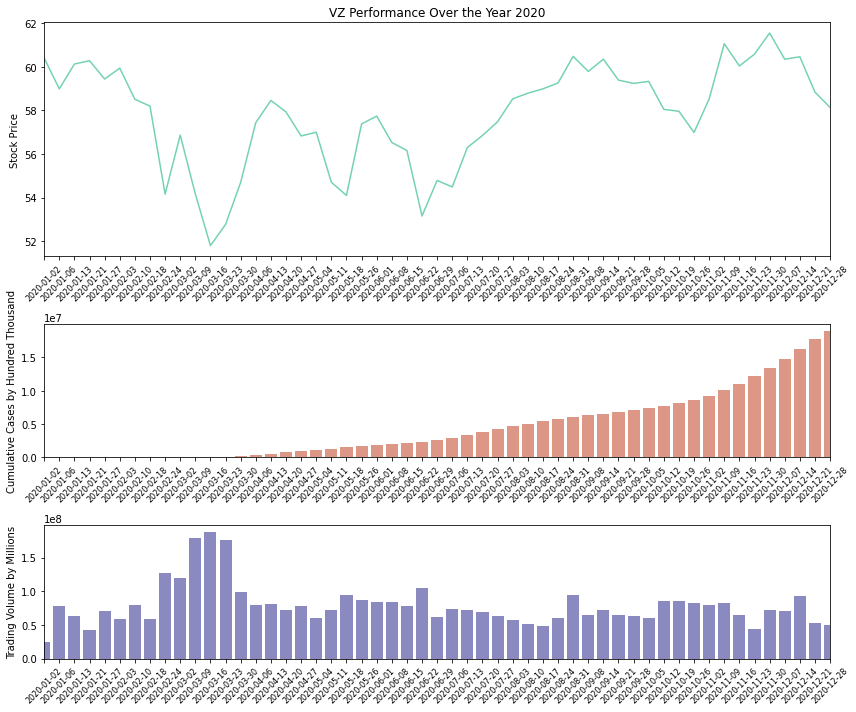

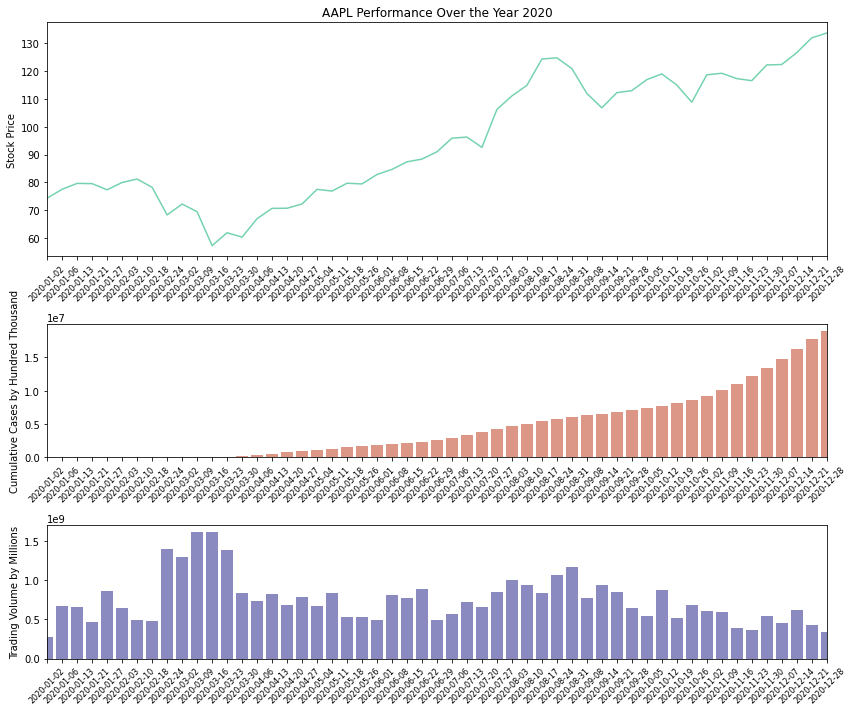

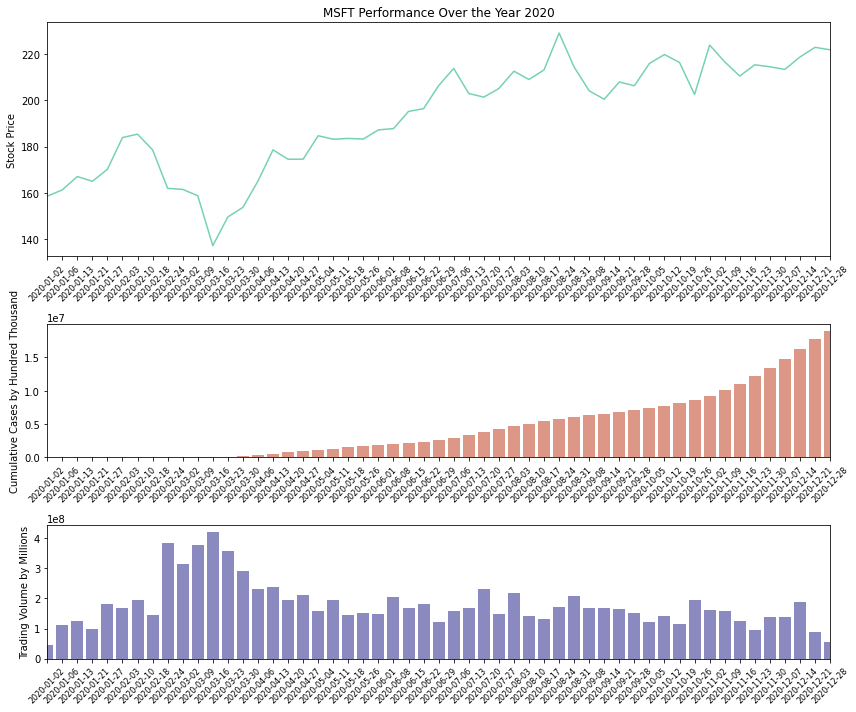

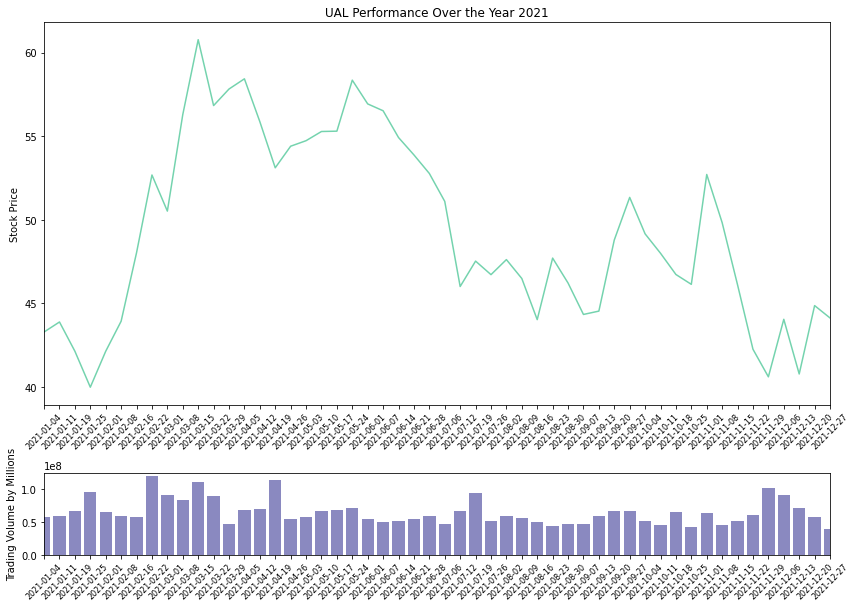

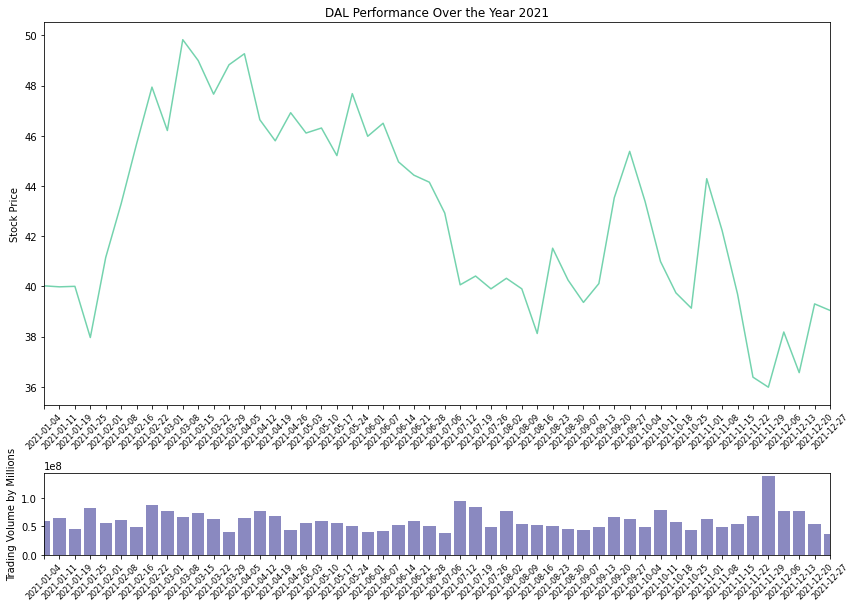

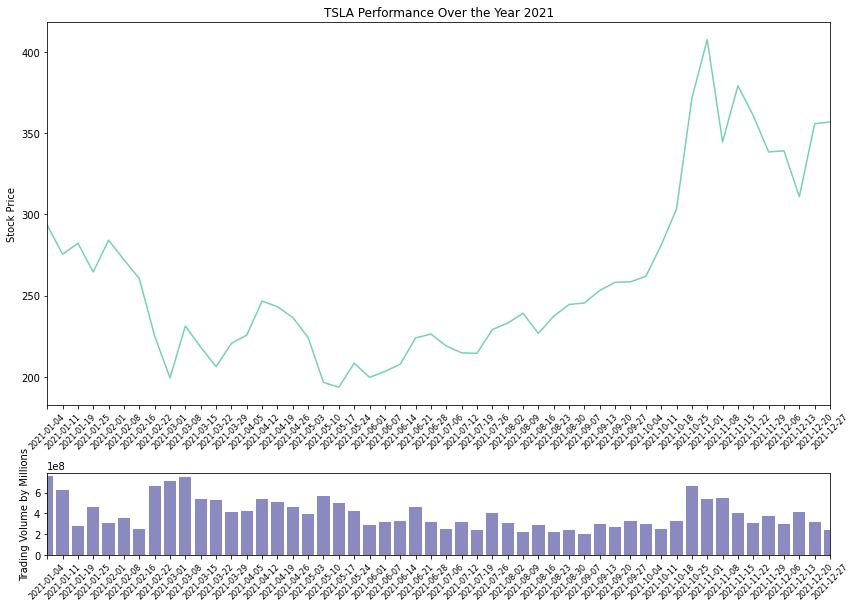

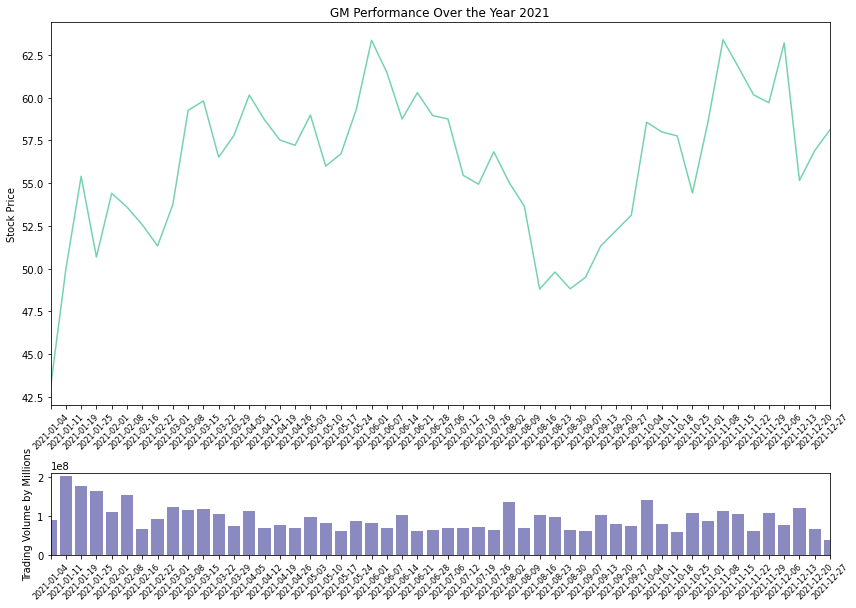

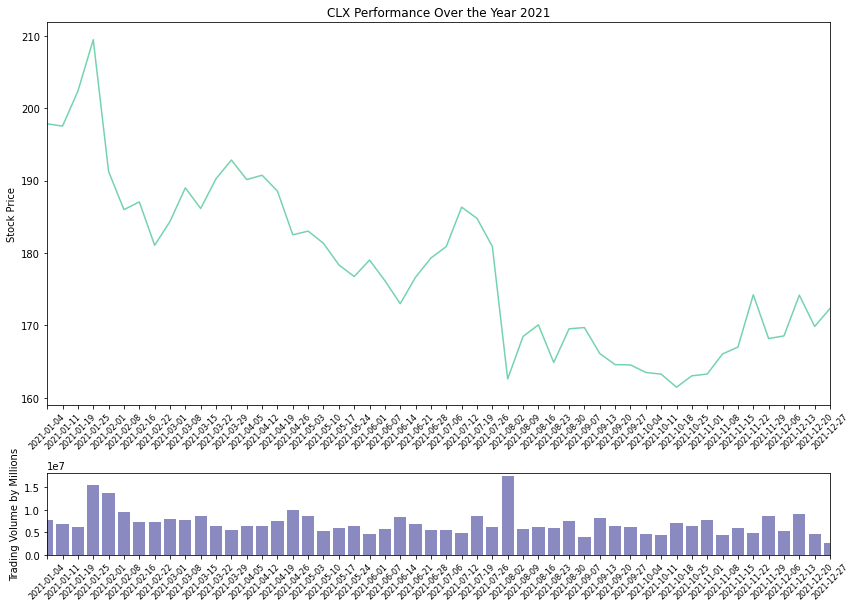

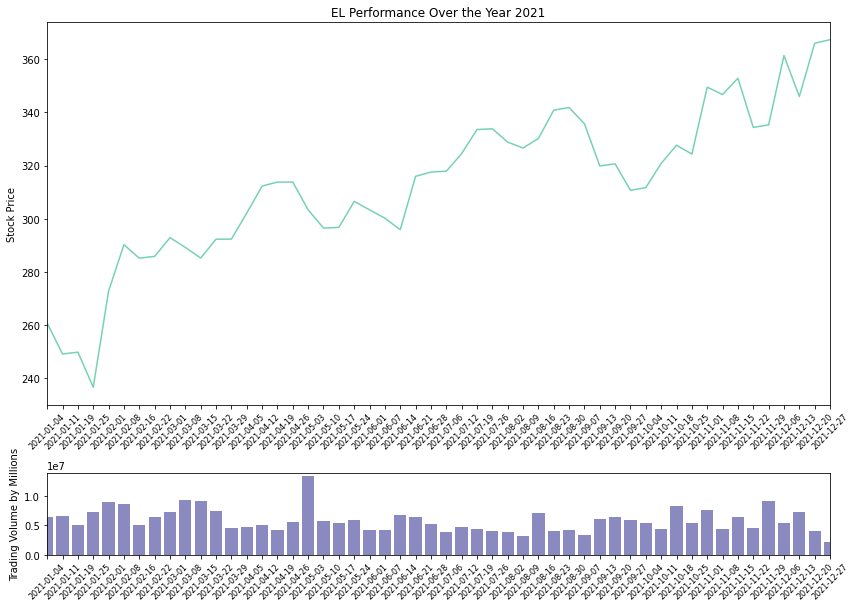

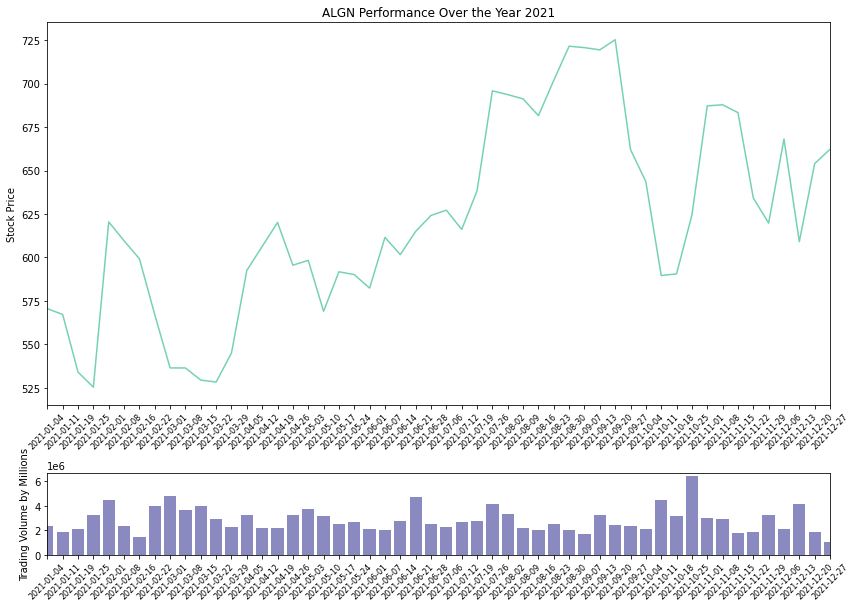

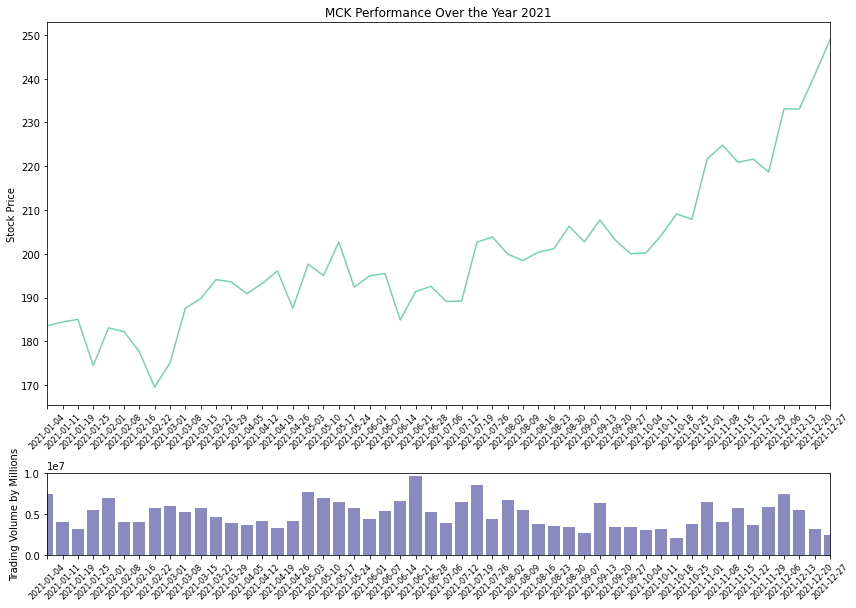

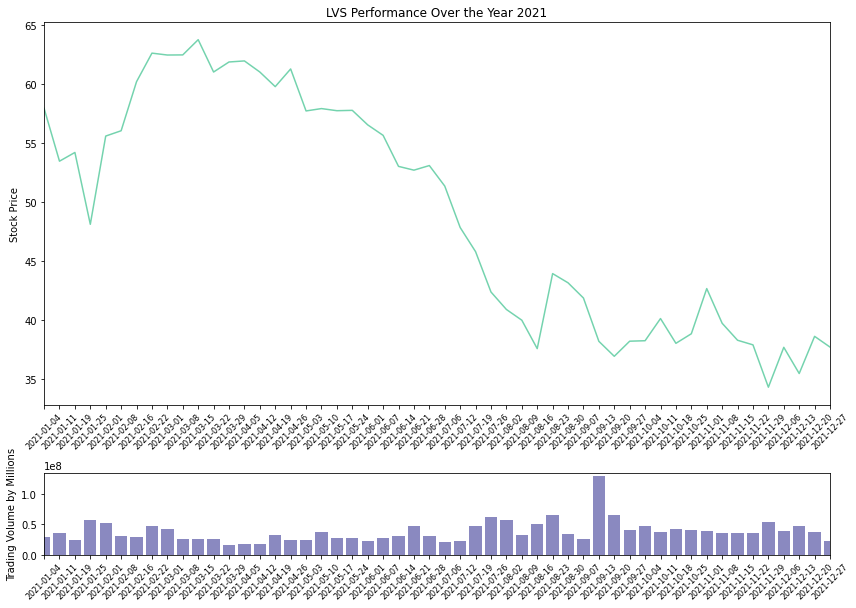

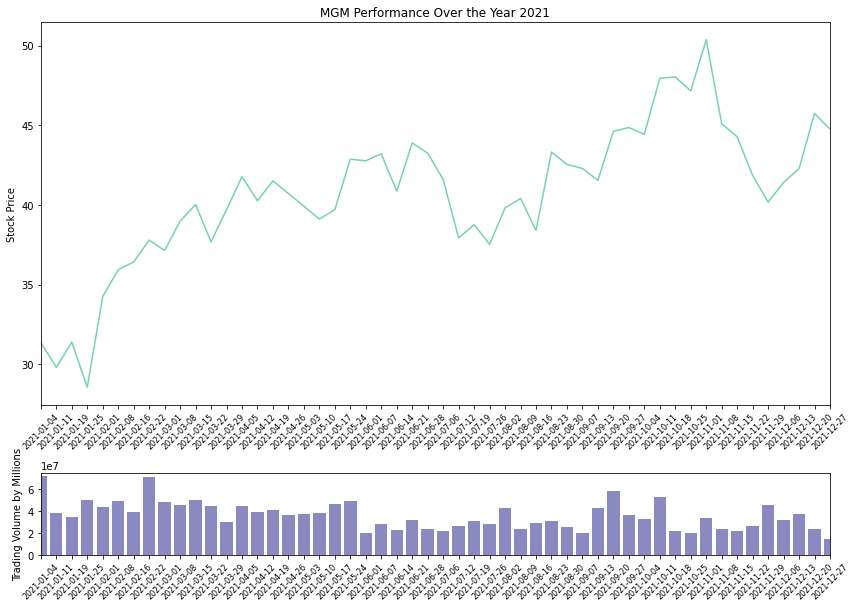

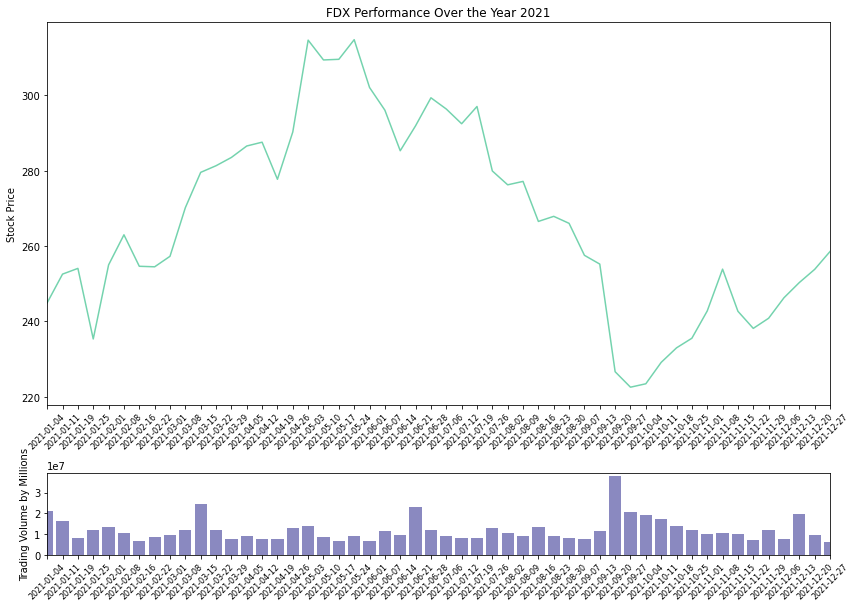

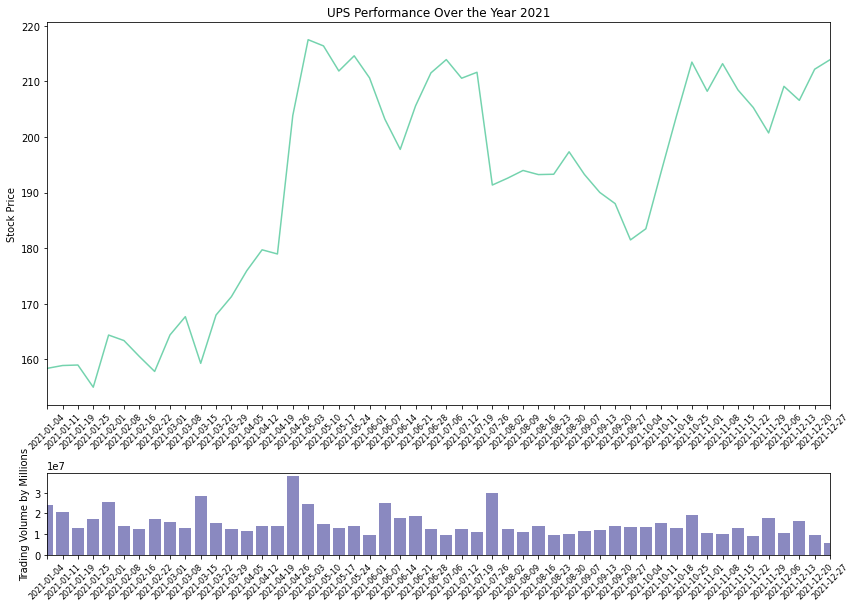

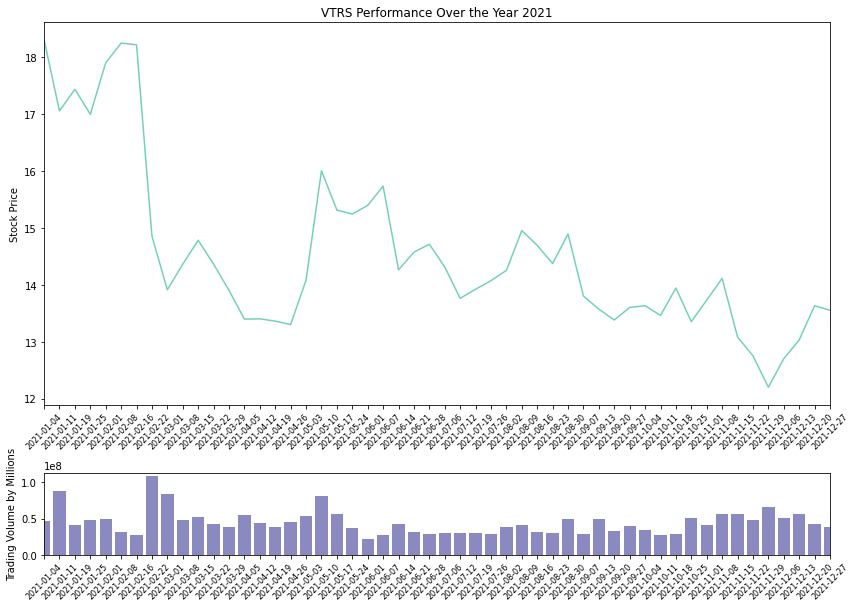

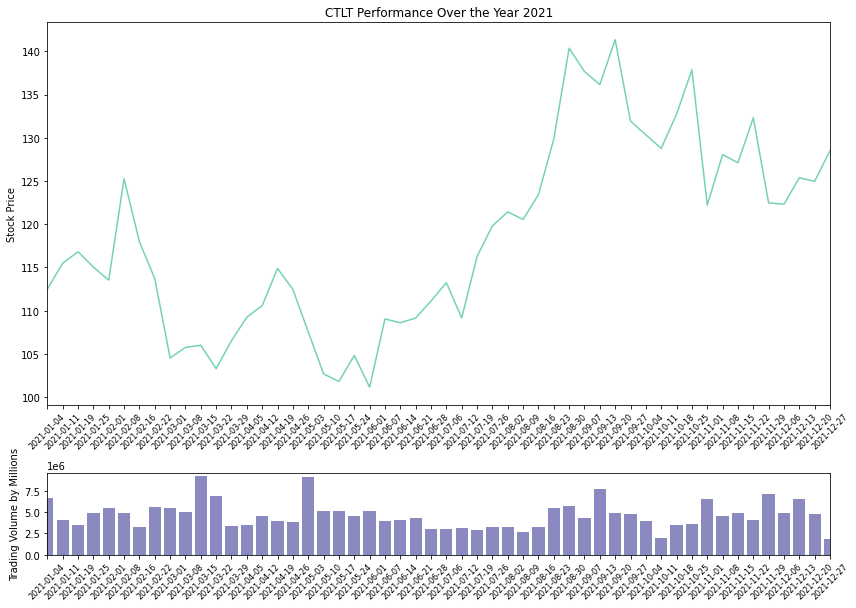

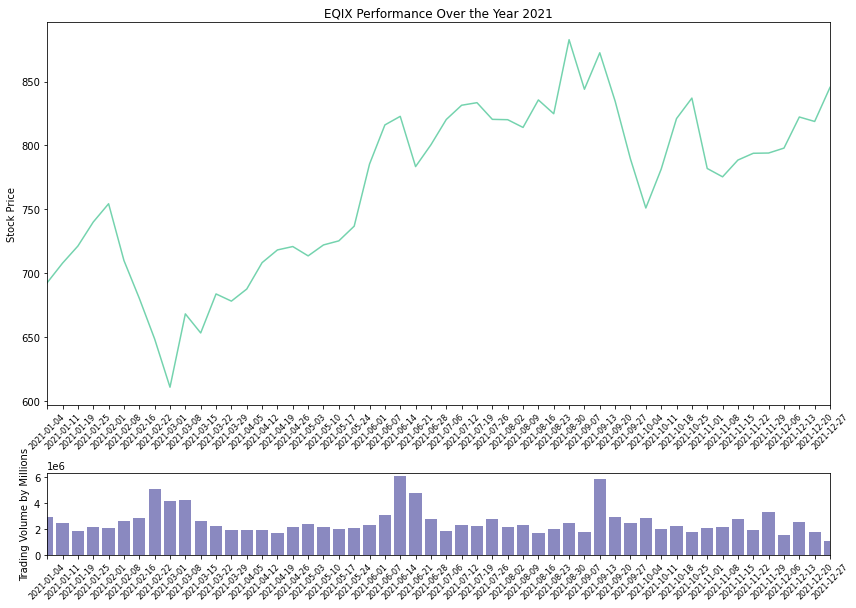

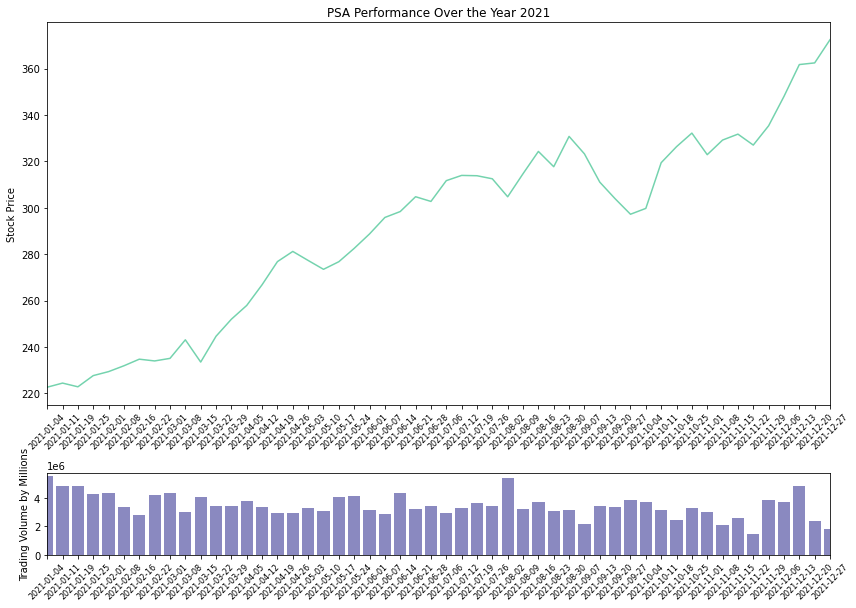

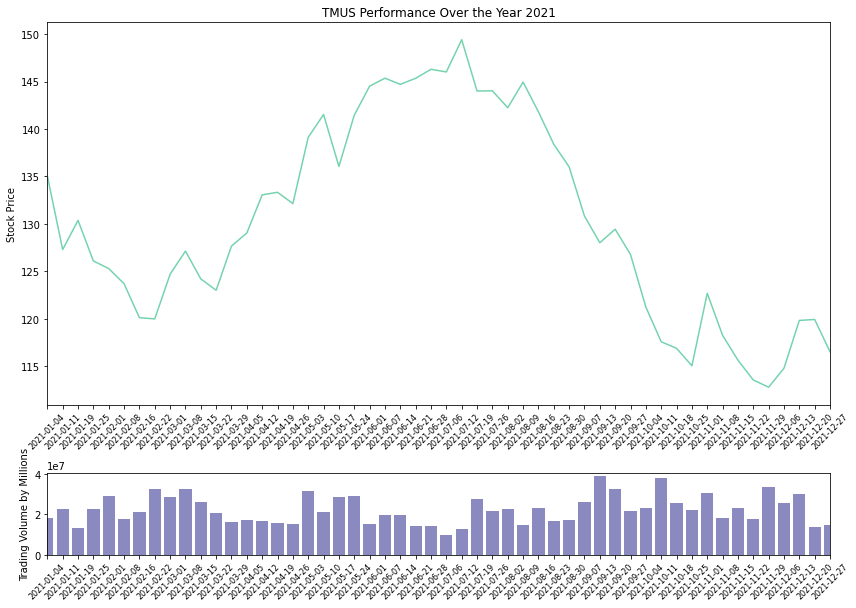

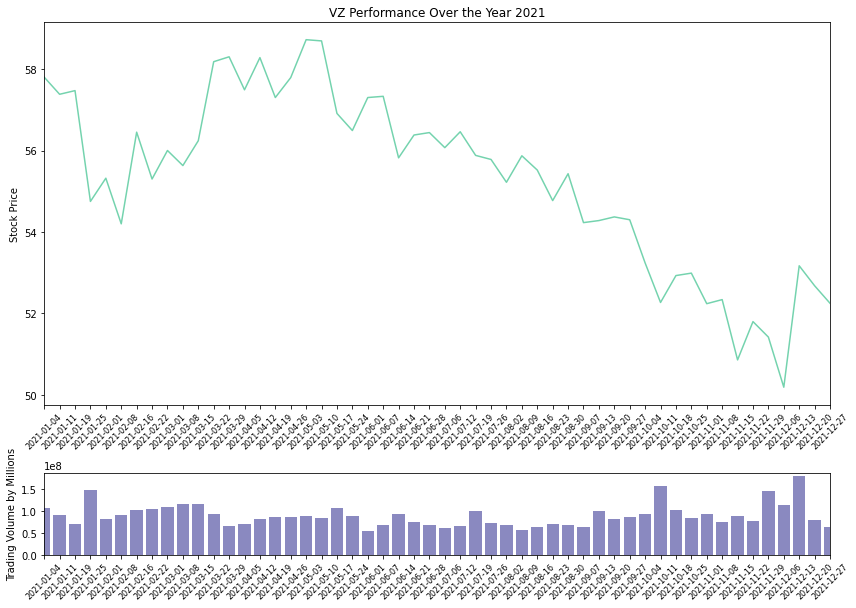

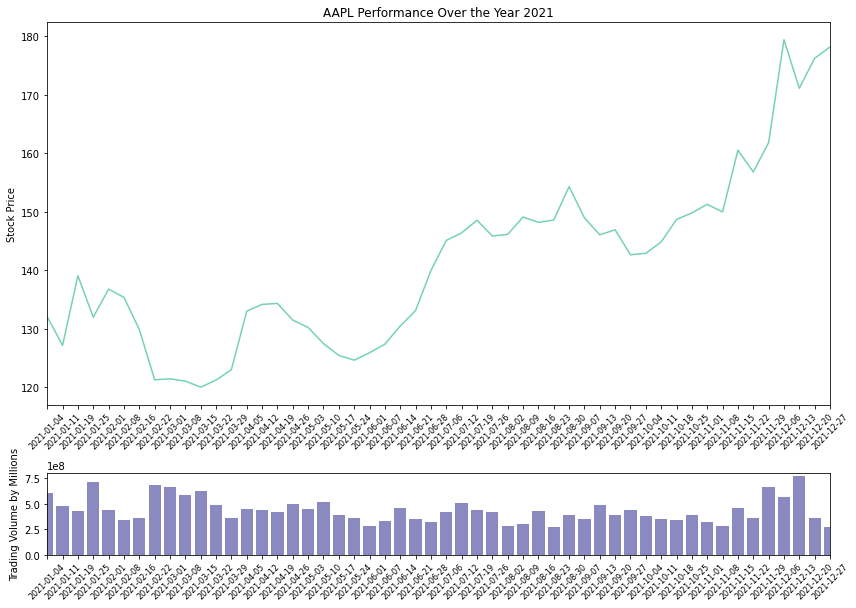

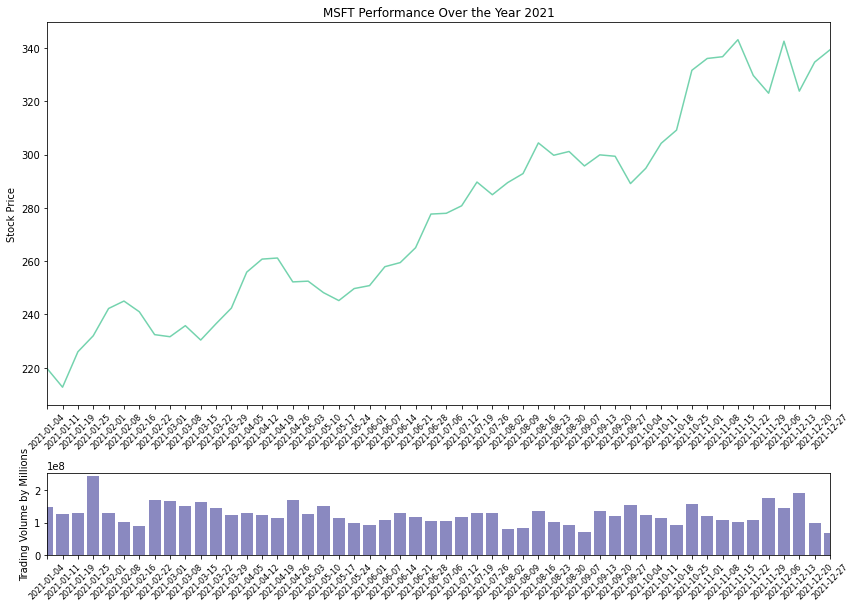

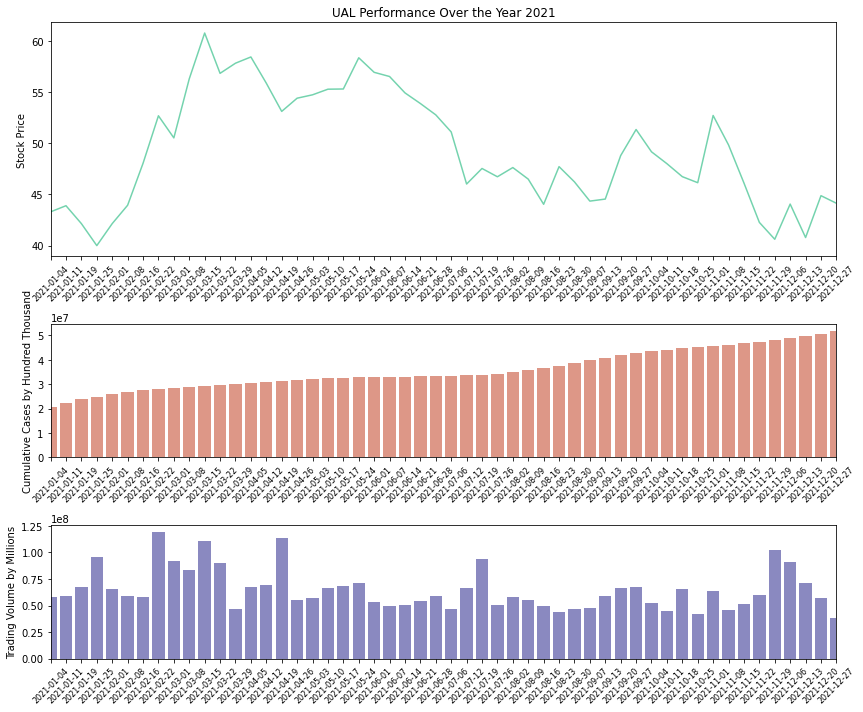

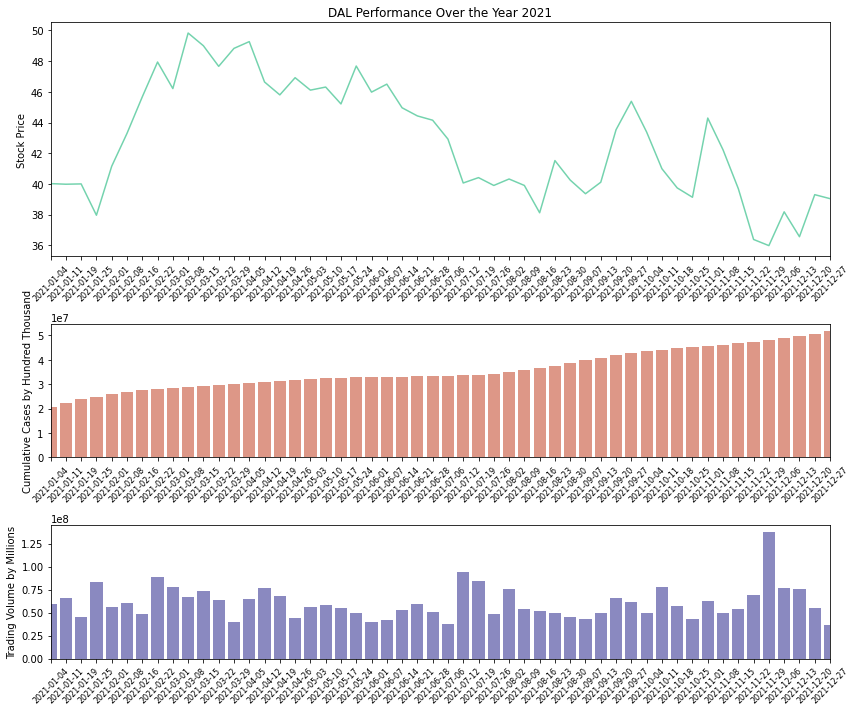

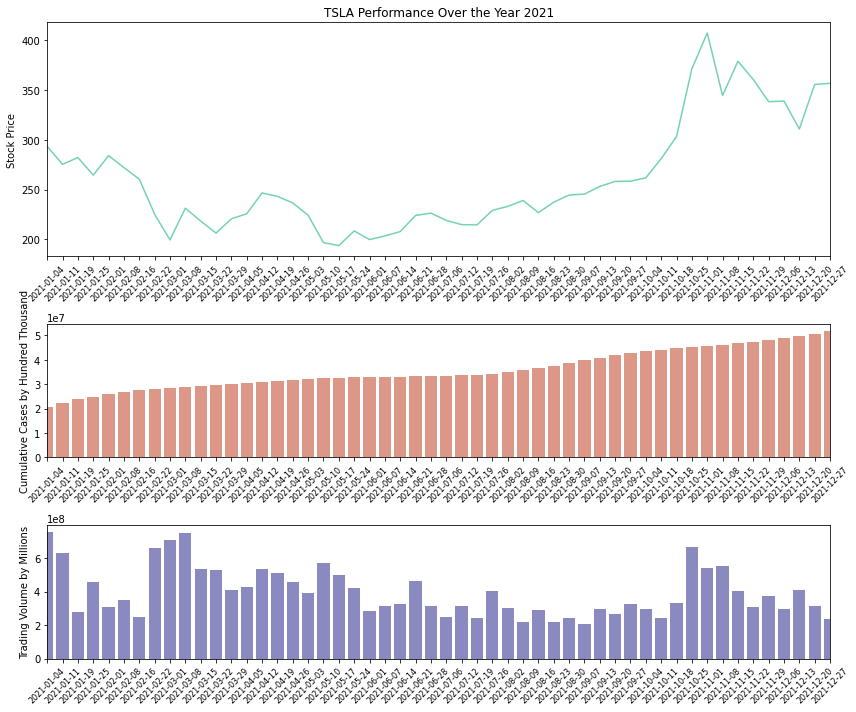

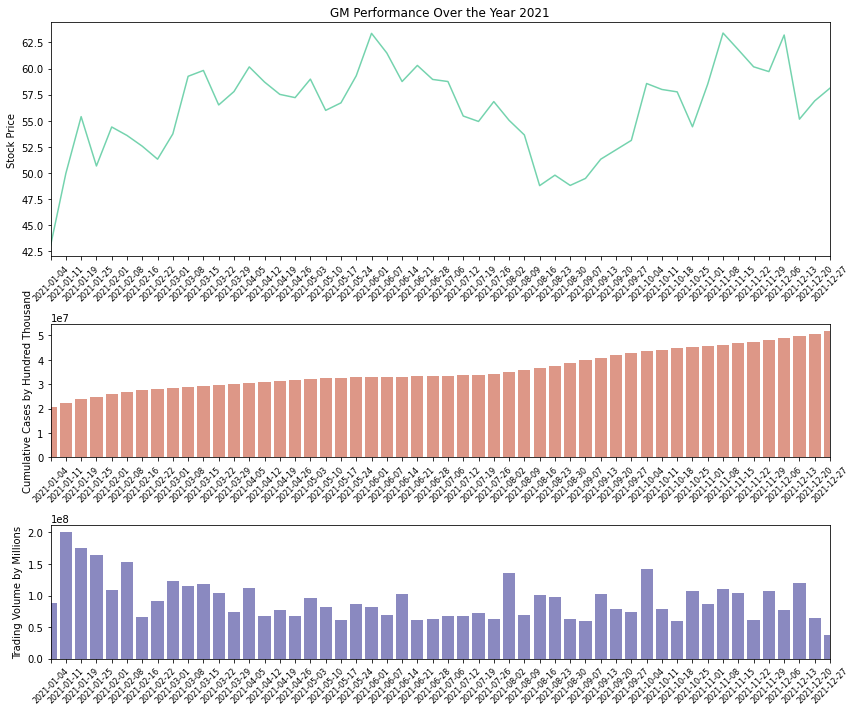

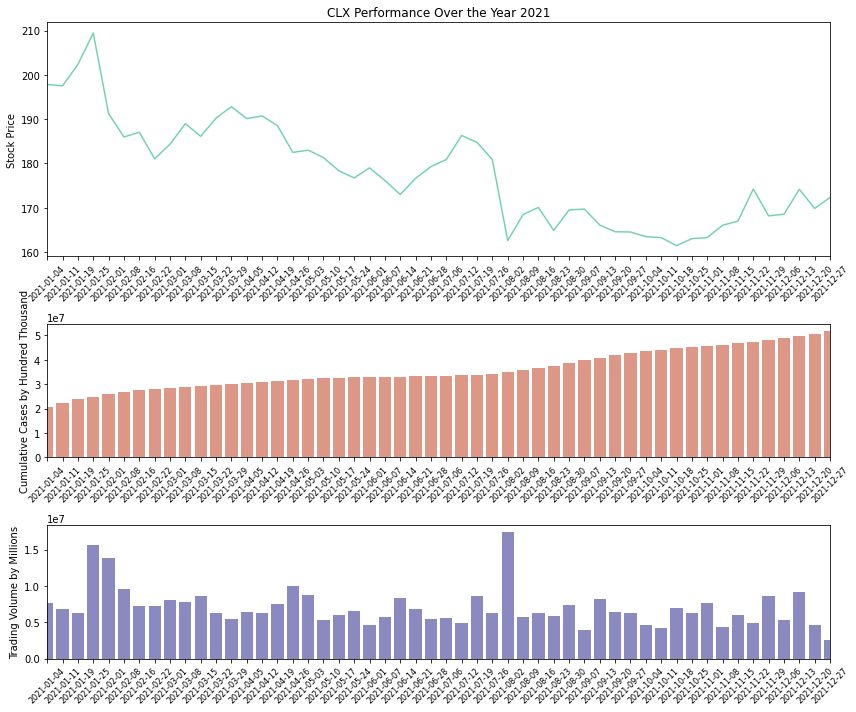

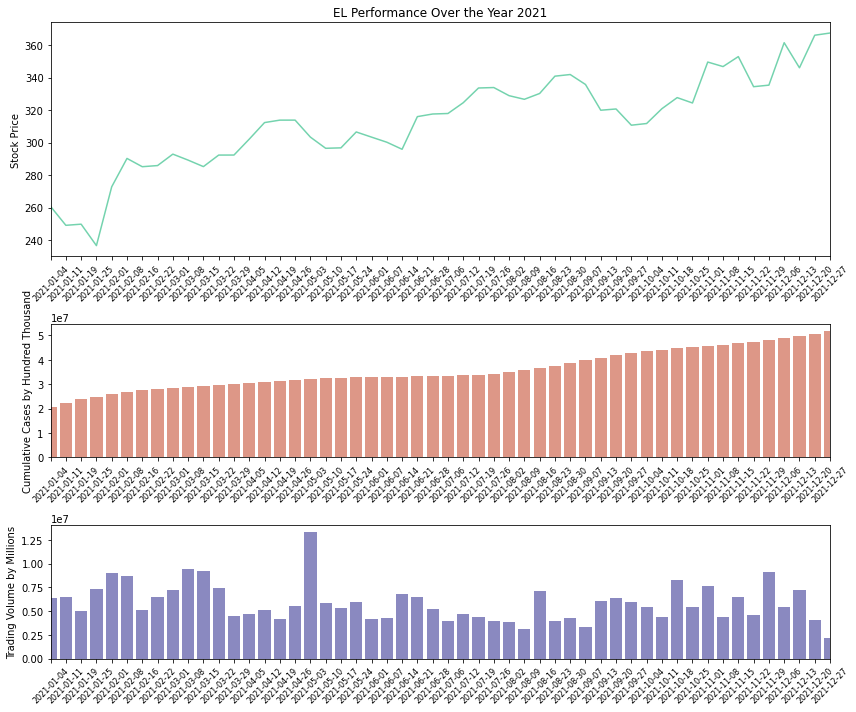

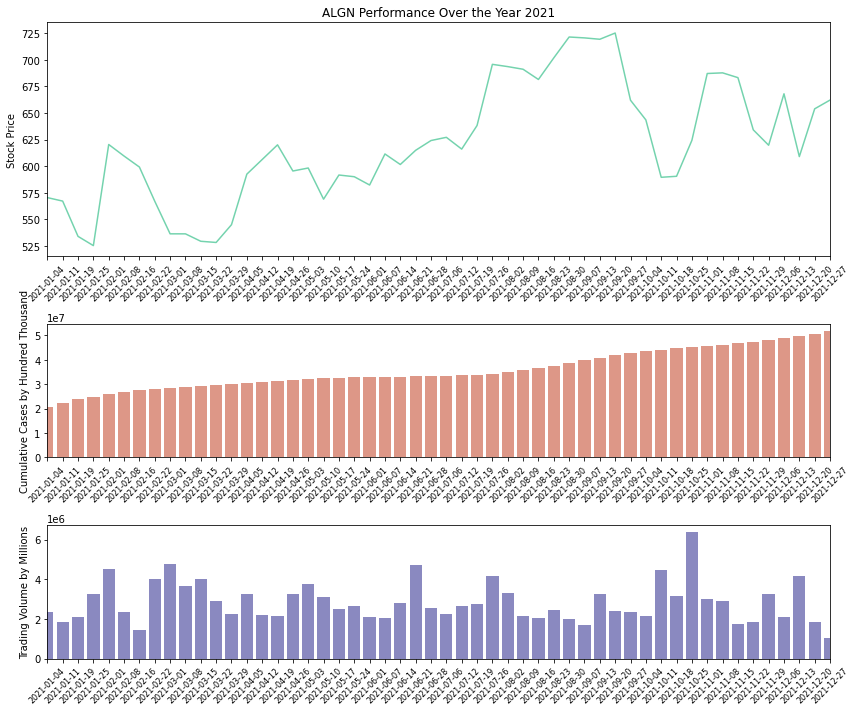

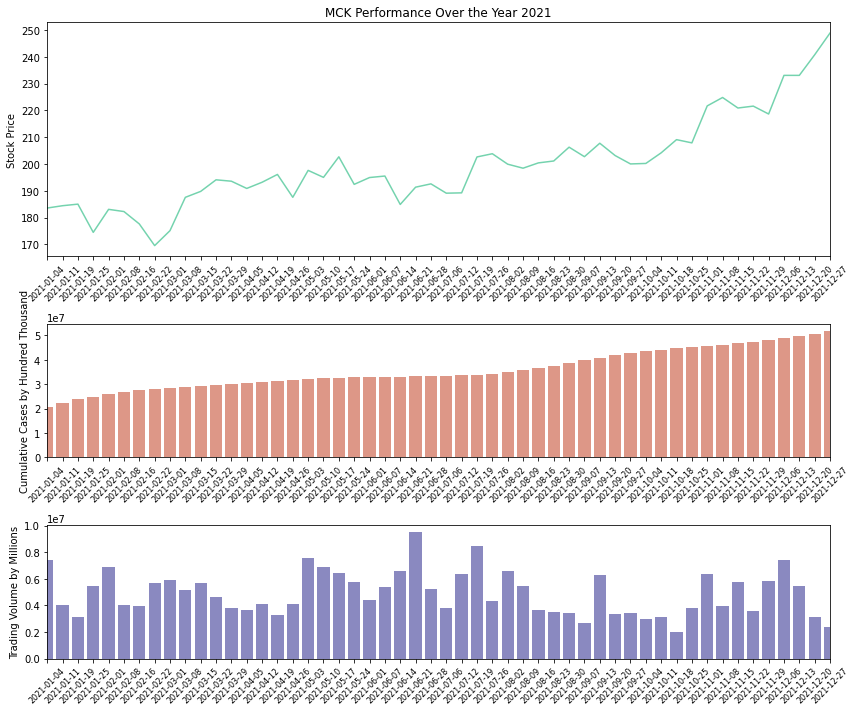

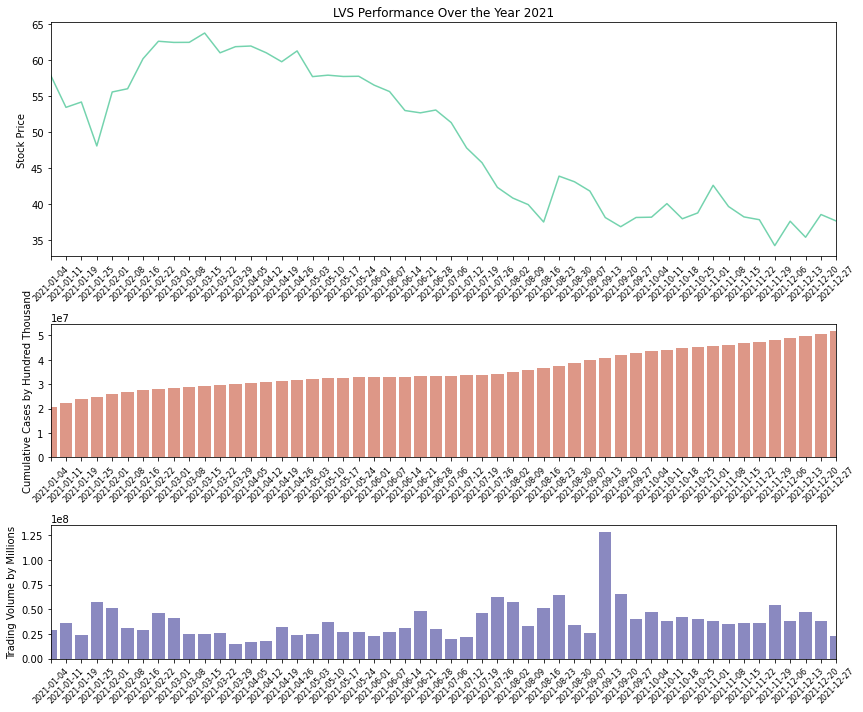

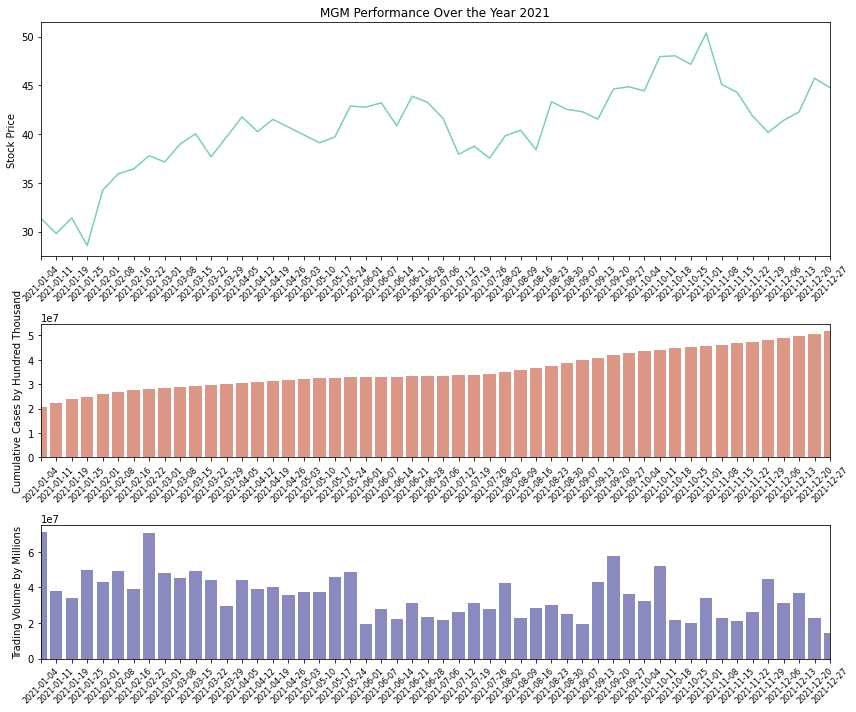

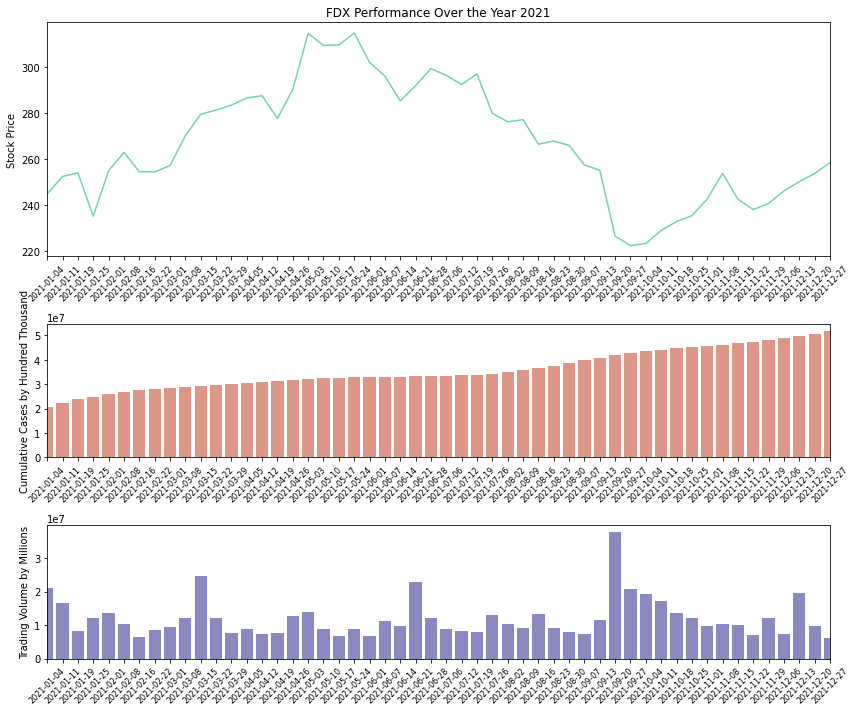

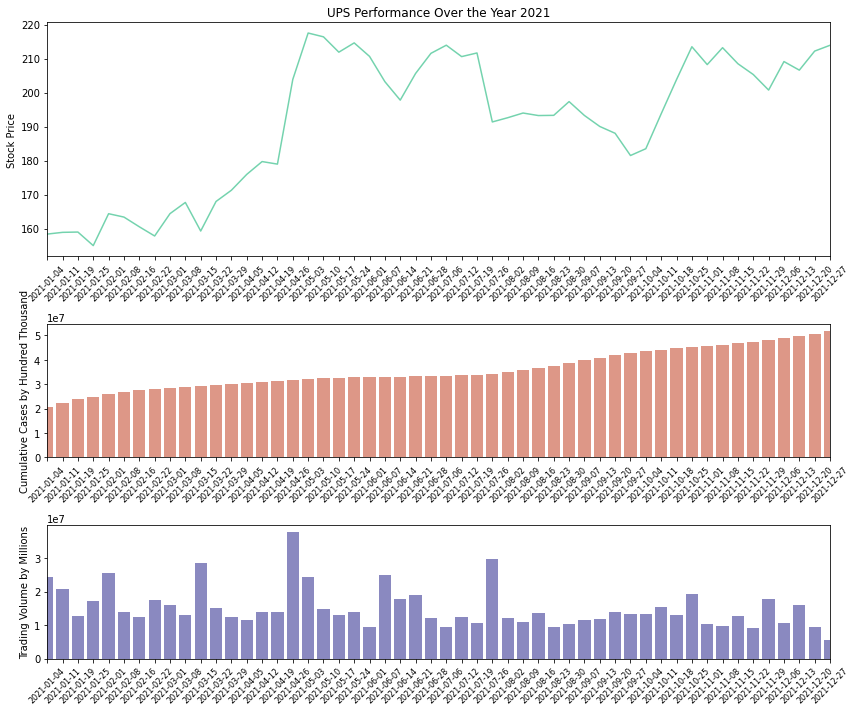

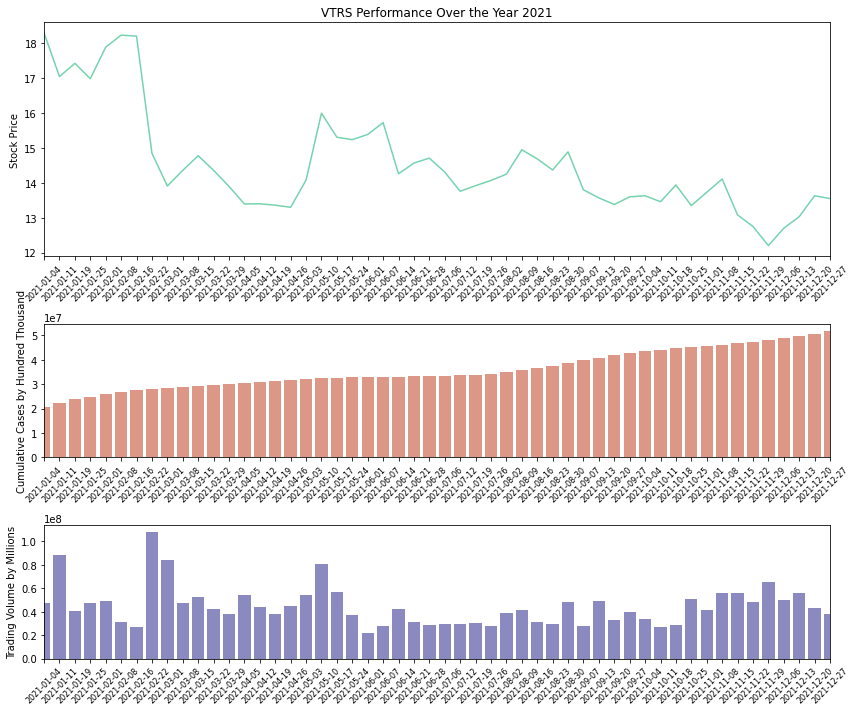

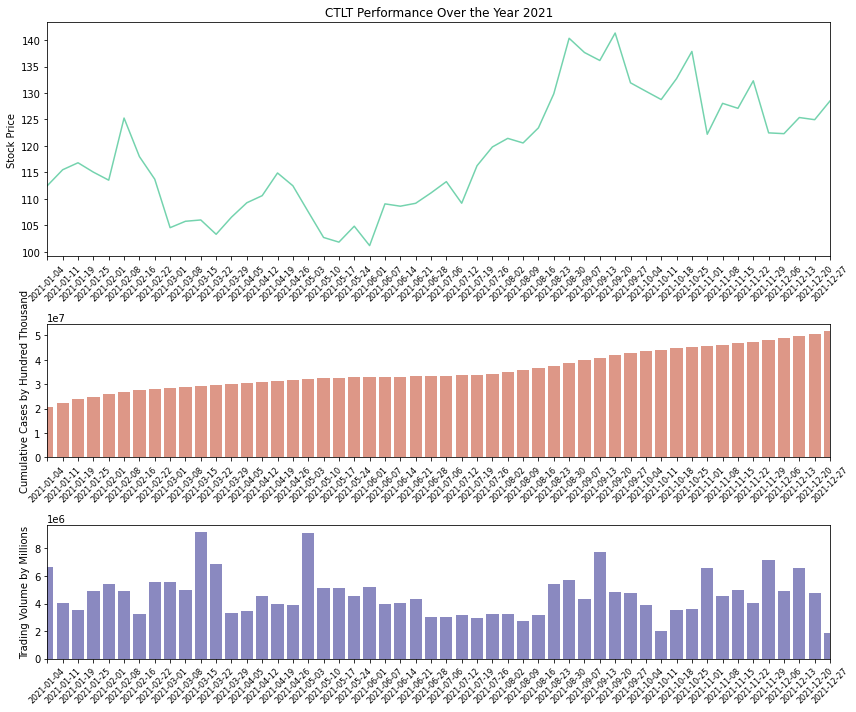

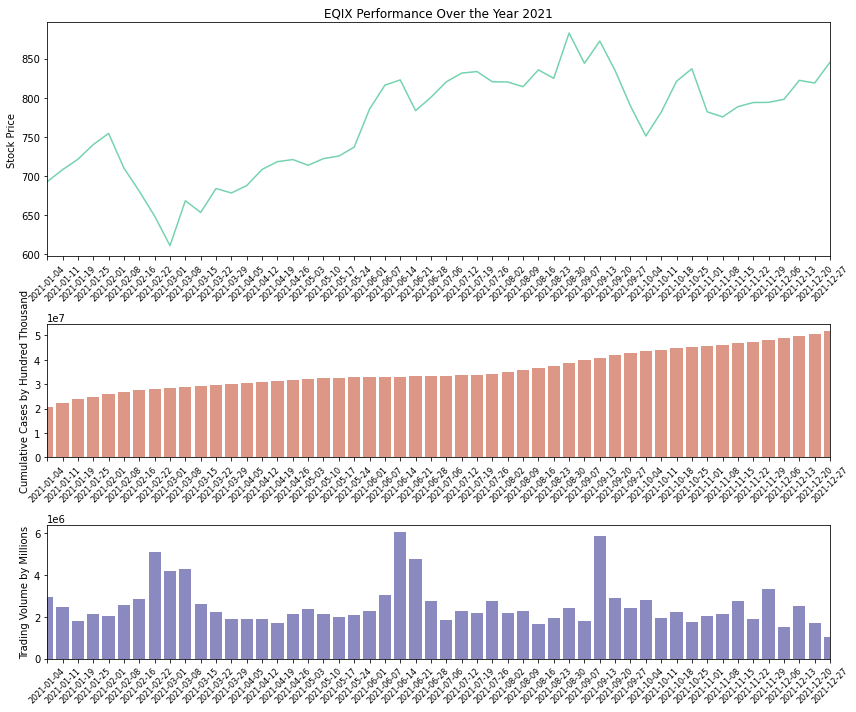

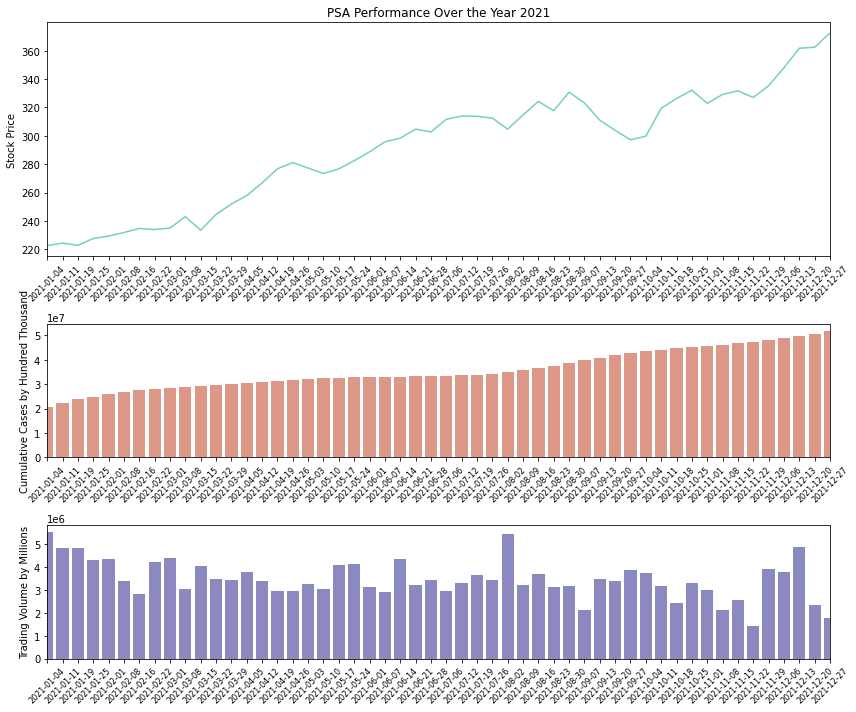

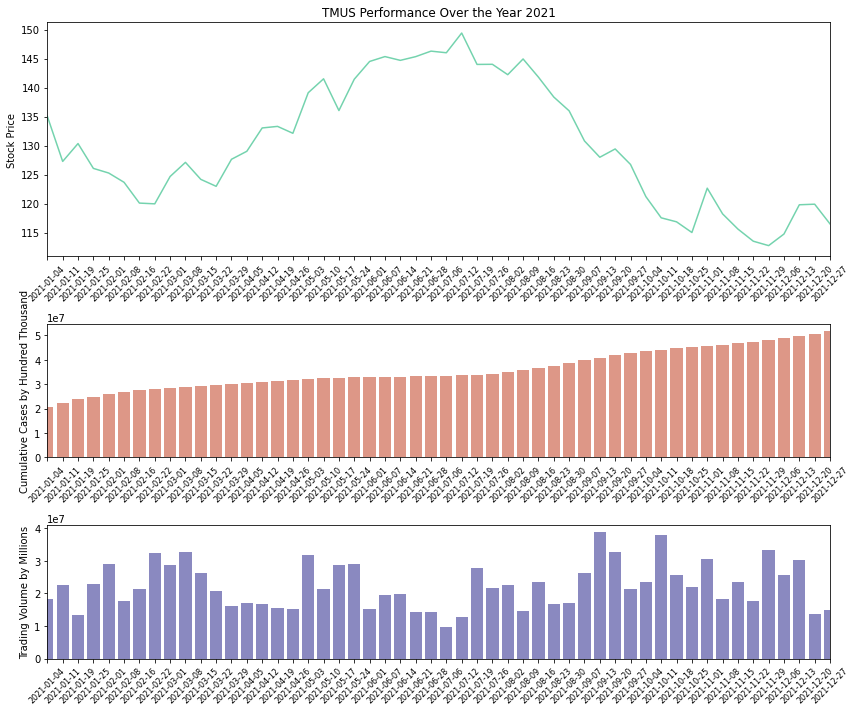

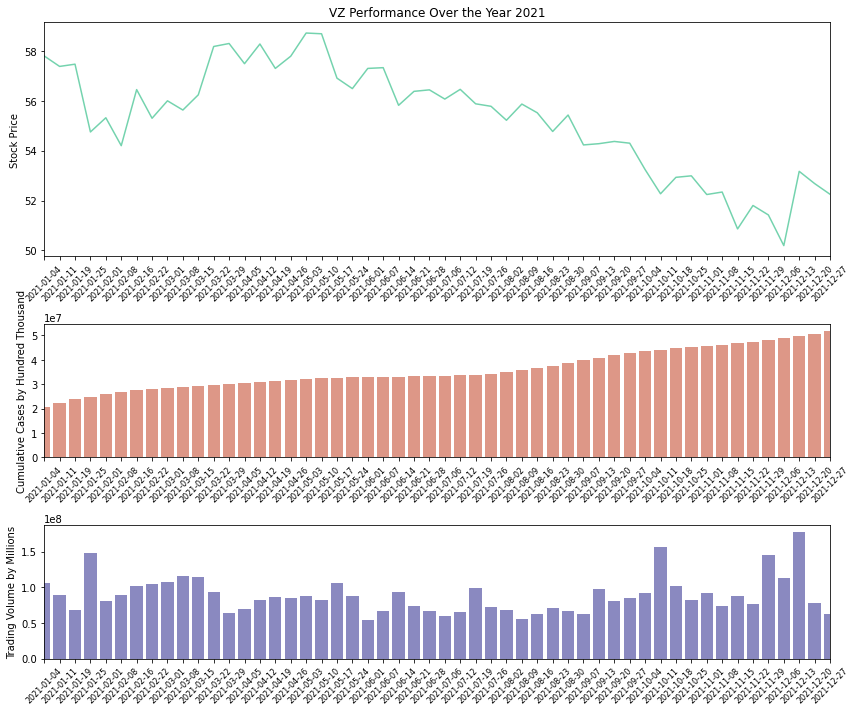

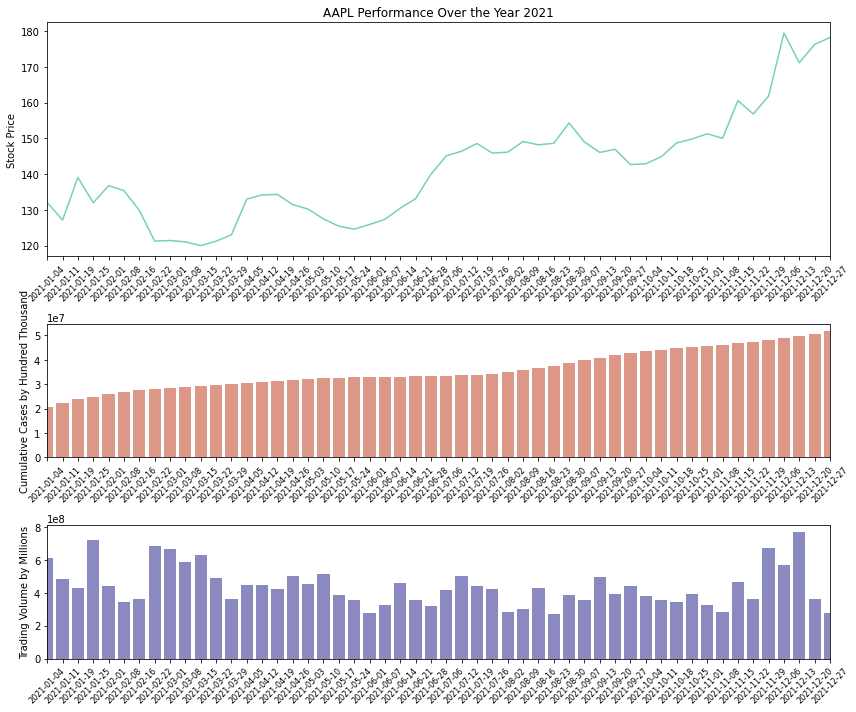

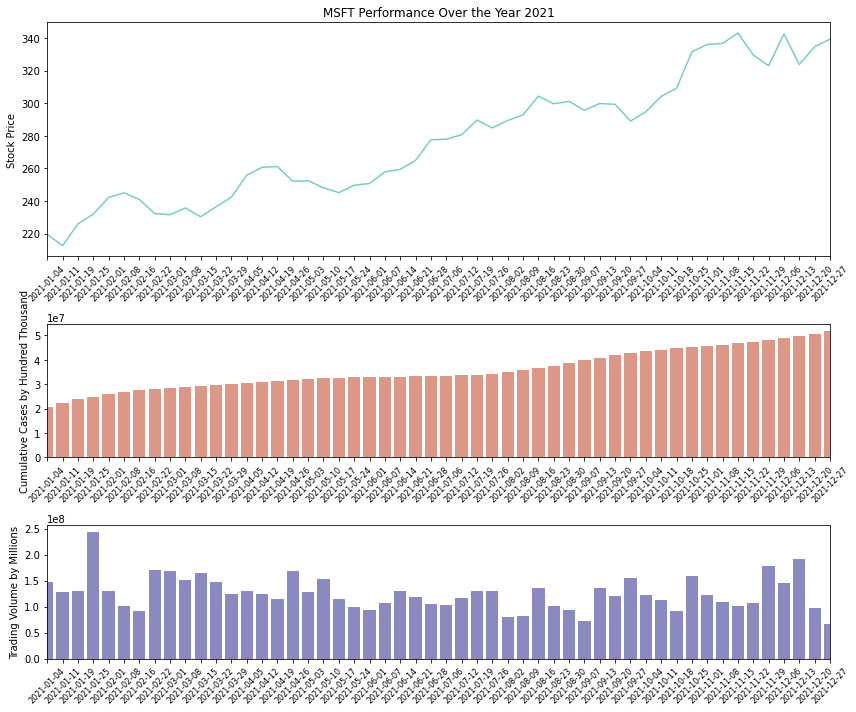

In [125]:
count = 0
for key in ticker_2019_data:
    plot_chart(ticker_2019_data[key],tickers[count],2019) 
    plt.savefig(f'Plotted_Images/2019_ticker_performance/{tickers[count]}_2019')
    count += 1
count = 0
for key in ticker_2020_data:
    plot_chart(ticker_2020_data[key],tickers[count],2020) 
    plt.savefig(f'Plotted_Images/2020_ticker_performance/{tickers[count]}_2020')
    count += 1
count = 0
for key in ticker_covid_2020:
    plot_chart_covid(ticker_covid_2020[key],tickers[count],2020) 
    plt.savefig(f'Plotted_Images/2020_covid_ticker/{tickers[count]}_covid_2020')
    count += 1
count = 0
for key in ticker_2021_data:
    plot_chart(ticker_2021_data[key],tickers[count],2021) 
    plt.savefig(f'Plotted_Images/2021_ticker_performance/{tickers[count]}_2021')
    count += 1
count = 0
for key in ticker_covid_2021:
    plot_chart_covid(ticker_covid_2021[key],tickers[count],2021) 
    plt.savefig(f'Plotted_Images/2021_covid_ticker/{tickers[count]}_covid_2021')
    count += 1